## Machine Learning Model Development

### Installing Packages

In [3]:
# Install all packages for this script
%pip install numpy>=1.21.0 pandas>=1.3.0 skimpy matplotlib>=3.8.3 scikit-learn==1.4.1.post1 seaborn>=0.12.2 plotly shap>=0.46.0 xgboost==2.1.4 imblearn graphviz lightgbm catboost lime imbalanced-learn==0.11.0 python-docx

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importing Libraries

In [4]:
import sklearn
print(sklearn.__version__)

1.4.1.post1


In [5]:
# Import Libraries for Preprocessing
import pandas as pd
import numpy as np
import matplotlib as mplot
import matplotlib.pyplot as plt
import json
from skimpy import skim

### Upload Dataset

In [6]:
# Load dataset
df_ml = pd.read_csv("df_ml.csv")

# Load the data types mapping
with open("dtypes_dict.json", "r") as file:
    dtypes_dict = json.load(file)

# Apply correct data types
for col, dtype in dtypes_dict.items():
    if dtype == "boolean":
        df_ml[col] = df_ml[col].astype(bool)
    elif isinstance(dtype, dict) and dtype.get("dtype") == "category":
        # Restore ordered categorical data
        df_ml[col] = pd.Categorical(df_ml[col], 
                                    categories=dtype["categories"], 
                                    ordered=dtype["ordered"])
    else:
        df_ml[col] = df_ml[col].astype(dtype)

In [7]:
print(df_ml.dtypes)
df_ml.shape

RIDAGEYR           float64
DMDEDUC2             int64
DMDHHSIZ           float64
RIAGENDR_Female      int32
RIAGENDR_Male        int32
DEPRE                int32
ALQ130             float64
ALQ142               int64
FNDADI               int32
HUQ010               int64
MCQ010               int32
MCQ053               int32
MCQ160A              int32
MCQ160B              int32
MCQ160C              int32
MCQ160F              int32
MCQ160P              int32
MCQ220               int32
PAD680             float64
RXQ050             float64
SLD012             float64
SLD013             float64
DMDMARTZ_2.0          bool
DMDMARTZ_3.0          bool
dtype: object


(5822, 24)

In [8]:
df_ml.sample(5)

RIDAGEYR  DMDEDUC2  DMDHHSIZ  RIAGENDR_Female  RIAGENDR_Male  DEPRE  \
1939      41.0         0       6.0                1              0      0   
4323      43.0         2       4.0                1              0      1   
2659      20.0         1       6.0                0              1      0   
1350      61.0         3       3.0                1              0      0   
2295      49.0         4       5.0                1              0      0   

      ALQ130  ALQ142  FNDADI  HUQ010  ...  MCQ160C  MCQ160F  MCQ160P  MCQ220  \
1939     0.0       0       0       1  ...        0        0        0       0   
4323    15.0       1       0       4  ...        0        0        1       0   
2659     2.0       1       0       0  ...        0        0        0       0   
1350     1.0       1       0       2  ...        0        0        0       1   
2295     2.0       1       0       0  ...        0        0        0       0   

      PAD680  RXQ050  SLD012  SLD013  DMDMARTZ_2.0  DMDMARTZ_3.0  
1939    30.0     1.0     9.0     9.5         False         False  
4323    60.0     0.0     6.0     5.0          True         False  
2659   300.0     0.0    10.5    10.5         False         False  
1350   720.0     2.0     7.0     7.0         False         False  
2295   360.0     1.0     8.0     9.0         False         False  

[5 rows x 24 columns]

In [9]:
skim(df_ml)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 5822   │ │ int32       │ 15    │                                                          │
│ │ Number of columns │ 24     │ │ float64     │ 7     │                                                          │
│ └───────────────────┴────────┘ │ bool        │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name          ┃ NA  ┃ NA %   ┃ mean    ┃ sd     ┃ p0        ┃ p25   ┃ p50  ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ RIDAGEYR             │   0 │      0 │      54 │     17 │        20 │    39 │   57 │   68 │    80 │ ▃▅▅▅▇▇  │  │
│ │ DMDEDUC2             │   0 │      0 │     2.9 │    1.1 │         0 │     2 │    3 │    4 │     4 │ ▁▂ ▅▇▇  │  │
│ │ DMDHHSIZ             │   0 │      0 │     2.6 │    1.5 │         1 │     2 │    2 │    3 │     7 │ ▅▇▃▃▁▁  │  │
│ │ RIAGENDR_Female      │   0 │      0 │    0.55 │    0.5 │         0 │     0 │    1 │    1 │     1 │ ▆    ▇  │  │
│ │ RIAGENDR_Male        │   0 │      0 │    0.45 │    0.5 │         0 │     0 │    0 │    1 │     1 │ ▇    ▆  │  │
│ │ DEPRE                │   0 │      0 │    0.13 │   0.33 │         0 │     0 │    0 │    0 │     1 │ ▇    ▁  │  │
│ │ ALQ130               │   0 │      0 │     2.2 │    1.9 │         0 │     1 │    2 │    2 │    15 │   ▇▁▁   │  │
│ │ ALQ142               │   0 │      0 │       1 │   0.46 │         0 │     1 │    1 │    1 │     3 │  ▁ ▇ ▁  │  │
│ │ FNDADI               │   0 │      0 │    0.19 │   0.39 │         0 │     0 │    0 │    0 │     1 │ ▇    ▂  │  │
│ │ HUQ010               │   0 │      0 │     1.6 │      1 │         0 │     1 │    2 │    2 │     4 │ ▃▇ ▇▃▁  │  │
│ │ MCQ010               │   0 │      0 │    0.18 │   0.39 │         0 │     0 │    0 │    0 │     1 │ ▇    ▂  │  │
│ │ MCQ053               │   0 │      0 │   0.051 │   0.22 │         0 │     0 │    0 │    0 │     1 │    ▇    │  │
│ │ MCQ160A              │   0 │      0 │    0.33 │   0.47 │         0 │     0 │    0 │    1 │     1 │ ▇    ▅  │  │
│ │ MCQ160B              │   0 │      0 │    0.04 │    0.2 │         0 │     0 │    0 │    0 │     1 │    ▇    │  │
│ │ MCQ160C              │   0 │      0 │   0.052 │   0.22 │         0 │     0 │    0 │    0 │     1 │    ▇    │  │
│ │ MCQ160F              │   0 │      0 │   0.045 │   0.21 │         0 │     0 │    0 │    0 │     1 │    ▇    │  │
│ │ MCQ160P              │   0 │      0 │    0.07 │   0.26 │         0 │     0 │    0 │    0 │     1 │ ▇    ▁  │  │
│ │ MCQ220               │   0 │      0 │    0.15 │   0.36 │         0 │     0 │    0 │    0 │     1 │ ▇    ▁  │  │
│ │ PAD680               │   0 │      0 │     360 │    210 │   5.4e-79 │   180 │  300 │  480 │  1400 │  ▅▇▅▂   │  │
│ │ RXQ050               │   0 │      0 │     2.3 │      2 │         0 │     0 │    2 │    4 │     5 │ ▇▃▃▃▂▆  │  │
│ │ SLD012               │   0 │      0 │     7.7 │    1.6 │         2 │     7 │    8 │  8.5 │    14 │   ▁▇▇▁  │  │
│ │ SLD013               │   0 │      0 │     8.3 │    1

### Creating ML Models

In [10]:
#Import ML Methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier

In [11]:
#Creating the classifier models

models = {
    "LR": LogisticRegression(C=0.1, penalty="l1" , solver="liblinear", class_weight="balanced"),
    "DT": DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=2, criterion='gini'),
    "RF": RandomForestClassifier(n_estimators=200, max_depth=5, min_samples_leaf=5 , min_samples_split=10 , max_features='log2',  class_weight='balanced'),
    "KNN": KNeighborsClassifier(n_neighbors=3, p=1, weights="distance"),
    "GBoost": GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=6),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=5, subsample=0.8, colsample_bytree=1.0, learning_rate=0.3),
    "LGBM": LGBMClassifier(n_estimators=100, max_depth=3, subsample=0.8, learning_rate=0.05, colsample_bytree=0.8, scale_pos_weight=3,
                           class_weight="balanced", boosting_type="gbdt", random_state=42),
    "BAGG_DT": BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3, min_samples_split=3), n_estimators=50,
                                max_samples=0.7,  # Train on 70% of data for each model
                                max_features=0.8,  # Use 80% of features
                                bootstrap=True,
                                random_state=42)                            
}

# We can iterate over the dictionary as follows:
for name, classifier in models.items():
    print("Classifier:", name, " ; Sklearn object:", classifier)

Classifier: LR  ; Sklearn object: LogisticRegression(C=0.1, class_weight='balanced', penalty='l1',
                   solver='liblinear')
Classifier: DT  ; Sklearn object: DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)
Classifier: RF  ; Sklearn object: RandomForestClassifier(class_weight='balanced', max_depth=5,
                       max_features='log2', min_samples_leaf=5,
                       min_samples_split=10, n_estimators=200)
Classifier: KNN  ; Sklearn object: KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')
Classifier: GBoost  ; Sklearn object: GradientBoostingClassifier(learning_rate=0.01, max_depth=6)
Classifier: XGBoost  ; Sklearn object: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=N

In [12]:
from sklearn.model_selection import train_test_split

# Split train and test subsets
X = df_ml.drop('DEPRE', axis=1)  # Features
y = df_ml['DEPRE']  # Target

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
# Function to plot target variable distribution to evaluate data imbalance

def plot_target_distribution(y_train, title="Count of Each Class in Target Variable"):
    """
    Plots the distribution of the target variable and prints class counts and proportions.
    
    Parameters:
    - y_train: array-like, the target variable.
    - title: str, title for the plot (default: 'Count of Each Class in Target Variable "DEPRE"').
    """
    # Check the distribution of the target variable
    unique_classes, class_counts = np.unique(y_train, return_counts=True)

    custom_colors = ['darkseagreen', 'lightsalmon'] 

    # Plot the bar chart
    plt.bar(unique_classes, class_counts, color=custom_colors)

    # Add title and labels
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')

    # Customize the x-axis labels
    plt.xticks([0, 1], ['0', '1'])

    # Show the plot
    plt.show()

    # Count the occurrences of each class
    class_counts = np.bincount(y_train)

    # Calculate the proportions of each class
    total_instances = len(y_train)
    class_proportions = class_counts / total_instances

    # Print the counts and proportions
    for class_label, count, proportion in zip(range(len(class_counts)), class_counts, class_proportions):
        print(f"Class {class_label}: Count = {count}, Proportion = {proportion:.4f}")

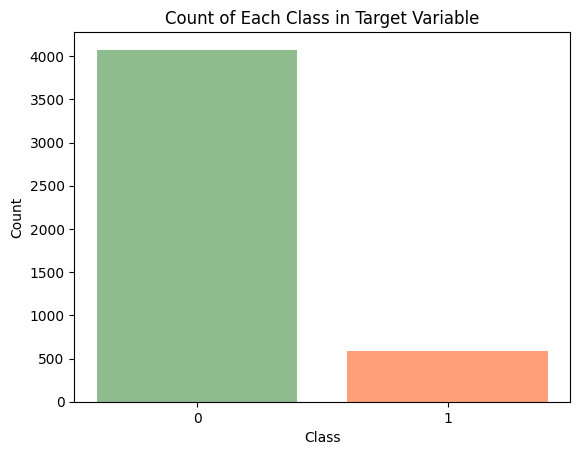

Class 0: Count = 4074, Proportion = 0.8748
Class 1: Count = 583, Proportion = 0.1252


In [14]:
plot_target_distribution(y_train)

### Solving Class Imbalance using Synthetic Minority Over-sampling Technique (SMOTE)

In [15]:
# Using SMOTE to oversampling and solve data imbalance

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)  # Auto balances both classes equally
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [16]:
skim(X_train_smote)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 8148   │ │ int32       │ 14    │                                                          │
│ │ Number of columns │ 23     │ │ float64     │ 7     │                                                          │
│ └───────────────────┴────────┘ │ bool        │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name          ┃ NA  ┃ NA %   ┃ mean    ┃ sd     ┃ p0        ┃ p25   ┃ p50  ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ RIDAGEYR             │   0 │      0 │      51 │     18 │        20 │    35 │   53 │   66 │    80 │ ▅▆▅▅▇▆  │  │
│ │ DMDEDUC2             │   0 │      0 │     2.7 │    1.1 │         0 │     2 │    3 │    3 │     4 │ ▁▂ ▆▇▅  │  │
│ │ DMDHHSIZ             │   0 │      0 │     2.5 │    1.4 │         1 │   1.6 │    2 │    3 │     7 │ ▇▇▃▂▁▁  │  │
│ │ RIAGENDR_Female      │   0 │      0 │     0.5 │    0.5 │         0 │     0 │    1 │    1 │     1 │ ▇    ▇  │  │
│ │ RIAGENDR_Male        │   0 │      0 │    0.31 │   0.46 │         0 │     0 │    0 │    1 │     1 │ ▇    ▃  │  │
│ │ ALQ130               │   0 │      0 │     2.3 │    1.9 │         0 │   1.1 │    2 │  2.6 │    15 │   ▇▂▁   │  │
│ │ ALQ142               │   0 │      0 │    0.97 │   0.45 │         0 │     1 │    1 │    1 │     3 │  ▁ ▇ ▁  │  │
│ │ FNDADI               │   0 │      0 │     0.2 │    0.4 │         0 │     0 │    0 │    0 │     1 │ ▇    ▂  │  │
│ │ HUQ010               │   0 │      0 │     1.7 │   0.96 │         0 │     1 │    2 │    2 │     4 │ ▂▆ ▇▃▁  │  │
│ │ MCQ010               │   0 │      0 │    0.14 │   0.35 │         0 │     0 │    0 │    0 │     1 │ ▇    ▁  │  │
│ │ MCQ053               │   0 │      0 │   0.034 │   0.18 │         0 │     0 │    0 │    0 │     1 │    ▇    │  │
│ │ MCQ160A              │   0 │      0 │     0.3 │   0.46 │         0 │     0 │    0 │    1 │     1 │ ▇    ▃  │  │
│ │ MCQ160B              │   0 │      0 │   0.024 │   0.15 │         0 │     0 │    0 │    0 │     1 │    ▇    │  │
│ │ MCQ160C              │   0 │      0 │   0.031 │   0.17 │         0 │     0 │    0 │    0 │     1 │    ▇    │  │
│ │ MCQ160F              │   0 │      0 │   0.031 │   0.17 │         0 │     0 │    0 │    0 │     1 │    ▇    │  │
│ │ MCQ160P              │   0 │      0 │   0.054 │   0.23 │         0 │     0 │    0 │    0 │     1 │    ▇    │  │
│ │ MCQ220               │   0 │      0 │     0.1 │    0.3 │         0 │     0 │    0 │    0 │     1 │ ▇    ▁  │  │
│ │ PAD680               │   0 │      0 │     380 │    220 │   5.4e-79 │   240 │  360 │  480 │  1400 │  ▅▇▅▂   │  │
│ │ RXQ050               │   0 │      0 │     2.5 │    1.9 │         0 │  0.75 │  2.2 │  4.9 │     5 │ ▇▃▃▃▃▇  │  │
│ │ SLD012               │   0 │      0 │     7.6 │    1.6 │         2 │   6.8 │  7.7 │  8.5 │    14 │   ▂▇▇▁  │  │
│ │ SLD013               │   0 │      0 │     8.2 │    1.7 │         2 │   7.3 │  8.1 │    9 │    14 │   ▁▅▇▂  │  │
│ └──────────────────────┴─────┴────────┴─────────┴─────

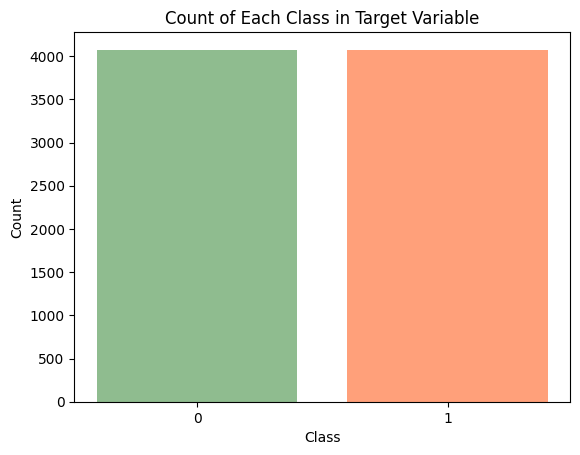

Class 0: Count = 4074, Proportion = 0.5000
Class 1: Count = 4074, Proportion = 0.5000


In [17]:
plot_target_distribution(y_train_smote)

In [18]:
# Normalilzing data for ML training

from sklearn.preprocessing import MinMaxScaler

# Identify numeric columns
num_cols_1 = X_train_smote.select_dtypes(include=['int32', 'float64', 'int64']).columns

# Scale only numeric columns
scaler_1 = MinMaxScaler()
X_train_scal = X_train_smote.copy()
X_test_scal = X_test.copy()
X_train_scal[num_cols_1] = scaler_1.fit_transform(X_train_smote[num_cols_1])
X_test_scal[num_cols_1] = scaler_1.transform(X_test[num_cols_1])

In [19]:
skim(X_train_scal)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 8148   │ │ float64     │ 21    │                                                          │
│ │ Number of columns │ 23     │ │ bool        │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name          ┃ NA   ┃ NA %   ┃ mean    ┃ sd     ┃ p0  ┃ p25     ┃ p50    ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ RIDAGEYR             │    0 │      0 │    0.52 │   0.29 │   0 │    0.25 │   0.55 │  0.77 │     1 │ ▅▆▅▅▇▆  │  │
│ │ DMDEDUC2             │    0 │      0 │    0.66 │   0.26 │   0 │     0.5 │   0.75 │  0.75 │     1 │ ▁▂ ▆▇▅  │  │
│ │ DMDHHSIZ             │    0 │      0 │    0.25 │   0.23 │   0 │   0.093 │   0.17 │  0.33 │     1 │ ▇▇▃▂▁▁  │  │
│ │ RIAGENDR_Female      │    0 │      0 │     0.5 │    0.5 │   0 │       0 │      1 │     1 │     1 │ ▇    ▇  │  │
│ │ RIAGENDR_Male        │    0 │      0 │    0.31 │   0.46 │   0 │       0 │      0 │     1 │     1 │ ▇    ▃  │  │
│ │ ALQ130               │    0 │      0 │    0.16 │   0.13 │   0 │   0.076 │   0.13 │  0.17 │     1 │   ▇▂▁   │  │
│ │ ALQ142               │    0 │      0 │    0.32 │   0.15 │   0 │    0.33 │   0.33 │  0.33 │     1 │  ▁ ▇ ▁  │  │
│ │ FNDADI               │    0 │      0 │     0.2 │    0.4 │   0 │       0 │      0 │     0 │     1 │ ▇    ▂  │  │
│ │ HUQ010               │    0 │      0 │    0.43 │   0.24 │   0 │    0.25 │    0.5 │   0.5 │     1 │ ▂▆ ▇▃▁  │  │
│ │ MCQ010               │    0 │      0 │    0.14 │   0.35 │   0 │       0 │      0 │     0 │     1 │ ▇    ▁  │  │
│ │ MCQ053               │    0 │      0 │   0.034 │   0.18 │   0 │       0 │      0 │     0 │     1 │    ▇    │  │
│ │ MCQ160A              │    0 │      0 │     0.3 │   0.46 │   0 │       0 │      0 │     1 │     1 │ ▇    ▃  │  │
│ │ MCQ160B              │    0 │      0 │   0.024 │   0.15 │   0 │       0 │      0 │     0 │     1 │    ▇    │  │
│ │ MCQ160C              │    0 │      0 │   0.031 │   0.17 │   0 │       0 │      0 │     0 │     1 │    ▇    │  │
│ │ MCQ160F              │    0 │      0 │   0.031 │   0.17 │   0 │       0 │      0 │     0 │     1 │    ▇    │  │
│ │ MCQ160P              │    0 │      0 │   0.054 │   0.23 │   0 │       0 │      0 │     0 │     1 │    ▇    │  │
│ │ MCQ220               │    0 │      0 │     0.1 │    0.3 │   0 │       0 │      0 │     0 │     1 │ ▇    ▁  │  │
│ │ PAD680               │    0 │      0 │    0.27 │   0.16 │   0 │    0.17 │   0.26 │  0.35 │     1 │  ▅▇▅▂   │  │
│ │ RXQ050               │    0 │      0 │     0.5 │   0.39 │   0 │    0.15 │   0.45 │  0.97 │     1 │ ▇▃▃▃▃▇  │  │
│ │ SLD012               │    0 │      0 │    0.47 │   0.13 │   0 │     0.4 │   0.48 │  0.54 │     1 │   ▂▇▇▁  │  │
│ │ SLD013               │    0 │      0 │    0.52 │   0.14 │   0 │    0.44 │   0.51 │  0.58 │     1 │   ▁▅▇▂  │  │
│ └──────────────────────┴──────┴────────┴─────────┴────────┴─────┴─────────┴────────┴───────┴───────┴─────────┘  │
│                                                      b

In [20]:
# Creating functions to train the models with cross-validation and plotting AUC-ROC for each folding

import time
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, roc_curve, make_scorer)

# Define Stratified K-Fold Cross-Validation (10 folds)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define scoring metrics (excluding AUC for now, since we will calculate it separately)
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=1),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

def plot_roc_curve(model, X_test, y_test, model_name):
    """
    Plots the ROC curve for a single model.
    """
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
    else:
        return  # If no probability or decision function, skip ROC curve
    
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc_score = roc_auc_score(y_test, y_scores)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

def cross_validate_models(models, X, y, X_test, y_test, cv, scoring):
    results = []

    for name, model in models.items():
        model_results = {
            'Model': name
        }
        auc_scores = []
        all_metrics = {metric: [] for metric in scoring.keys()}  # For storing metrics

        # Measure training time
        start_train = time.time()
        model.fit(X, y)
        end_train = time.time()
        training_time = end_train - start_train

        # Measure prediction time
        start_pred = time.time()
        y_pred = model.predict(X)
        end_pred = time.time()
        prediction_time = end_pred - start_pred

        # Store timings
        model_results['training_time'] = training_time
        model_results['prediction_time'] = prediction_time

        # Compute cross-validation scores
        for metric, scorer in scoring.items():
            try:
                scores = cross_val_score(model, X, y, cv=cv, scoring=scorer)
                model_results[metric] = np.mean(scores)  # Store average score
            except Exception:
                model_results[metric] = np.nan

        # Evaluate on the test set after training
        evaluate_test_set(model, X_test, y_test, model_results)

        # Initialize ROC curve plot
        plt.figure(figsize=(8, 6))

        # Compute AUC Score separately for cross-validation
        for fold, (train_idx, test_idx) in enumerate(cv.split(X, y), 1):
            X_train, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]

            model.fit(X_train, y_train)

            # Check if the model supports probability or decision function
            if hasattr(model, "predict_proba"):
                y_scores = model.predict_proba(X_test_fold)[:, 1]
            elif hasattr(model, "decision_function"):
                y_scores = model.decision_function(X_test_fold)
            else:
                y_scores = None  

            if y_scores is not None:
                auc = roc_auc_score(y_test_fold, y_scores)
                auc_scores.append(auc)

                # Plot ROC curve for each fold
                plot_roc_curve(model, X_test_fold, y_test_fold, name)

        # Compute average AUC
        model_results['average_AUC_CV'] = np.mean(auc_scores) if auc_scores else np.nan

        # Finalize ROC curve plot
        plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Baseline
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - {name}")
        plt.legend(loc="lower right")
        plt.show()

        # Add model results to the list
        results.append(model_results)

    # Create a DataFrame for comparison
    results_df = pd.DataFrame(results)

    # Ensure that the 'Model' column is the first column
    results_df = results_df[['Model'] + [col for col in results_df.columns if col != 'Model']]

    return results_df

def evaluate_test_set(model, X_test, y_test, model_results):
    # Make predictions
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, zero_division=1)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    # AUC score is only available if we have probability predictions
    auc = roc_auc_score(y_test, y_test_prob) if y_test_prob is not None else np.nan

    # Store the test set evaluation results in the model_results
    model_results['test_accuracy'] = accuracy
    model_results['test_precision'] = precision
    model_results['test_recall'] = recall
    model_results['test_f1'] = f1
    model_results['test_AUC'] = auc

In [21]:
# Creating function to plot models performance metrics

import matplotlib.pyplot as plt
import seaborn as sns

def plot_model_results(df):
    # Define the classifiers' names (assuming 'Model' is the index)
    classifiers = df['Model'].tolist()

    # Define the metrics to plot
    timing_cols = ['training_time', 'prediction_time']
    #metrics_cols = ['accuracy', 'precision', 'recall', 'f1', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1']
    metrics_cols_1 = ['accuracy', 'precision', 'recall', 'f1', 'average_AUC_CV']
    metrics_cols_2 = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_AUC']
    auc_cols = ['average_AUC_CV', 'test_AUC']
    
    # Plot the training and prediction times
    fig, ax = plt.subplots(figsize=(12, 6))
    df[timing_cols].plot(kind='bar', ax=ax, color=['#FF5733', '#33FF57'], width=0.8)
    ax.set_xticklabels(classifiers, rotation=45, ha="right")
    ax.set_title('Time Metrics per Classifier', fontsize=16)
    ax.set_xlabel('Classifier', fontsize=12)
    ax.set_ylabel('Time (seconds)', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Plot the train performance metrics
    fig, ax = plt.subplots(figsize=(12, 8))
    df[metrics_cols_1].plot(kind='bar', ax=ax, width=0.8)
    ax.set_xticklabels(classifiers, rotation=45, ha="right")
    ax.set_title('Training Performance Metrics per Classifier', fontsize=16)
    ax.set_xlabel('Classifier', fontsize=12)
    ax.set_ylabel('Score', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Plot the train performance metrics
    fig, ax = plt.subplots(figsize=(12, 8))
    df[metrics_cols_2].plot(kind='bar', ax=ax, width=0.8)
    ax.set_xticklabels(classifiers, rotation=45, ha="right")
    ax.set_title('Testing Performance Metrics per Classifier', fontsize=16)
    ax.set_xlabel('Classifier', fontsize=12)
    ax.set_ylabel('Score', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Plot the AUC values
    fig, ax = plt.subplots(figsize=(12, 6))
    df[auc_cols].plot(kind='bar', ax=ax, width=0.8)
    ax.set_xticklabels(classifiers, rotation=45, ha="right")
    ax.set_title('AUC per Classifier', fontsize=16)
    ax.set_xlabel('Classifier', fontsize=12)
    ax.set_ylabel('AUC', fontsize=12)
    plt.tight_layout()
    plt.show()

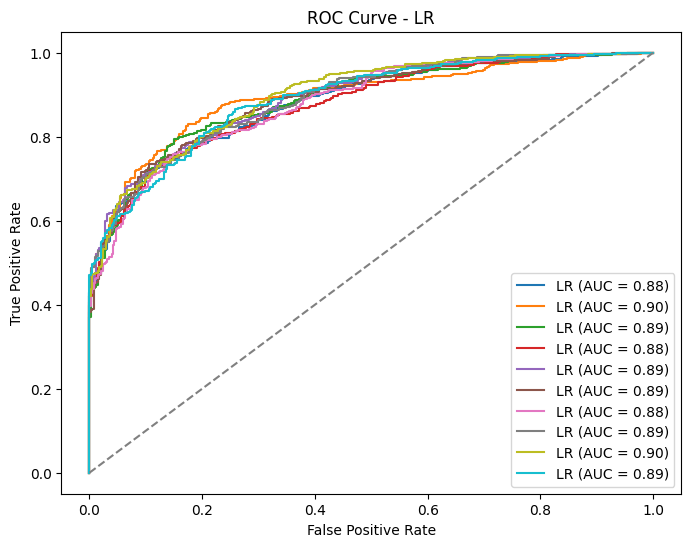

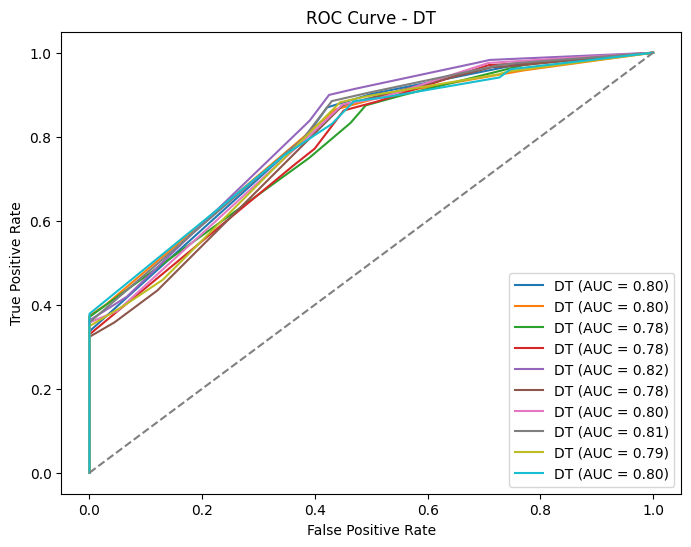

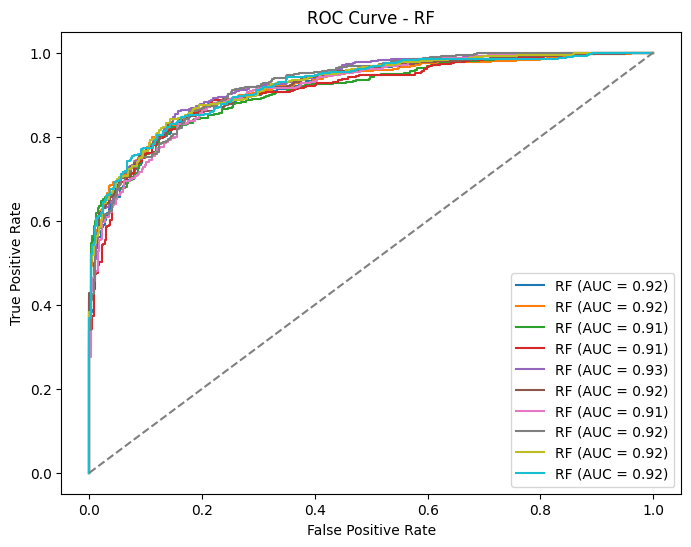

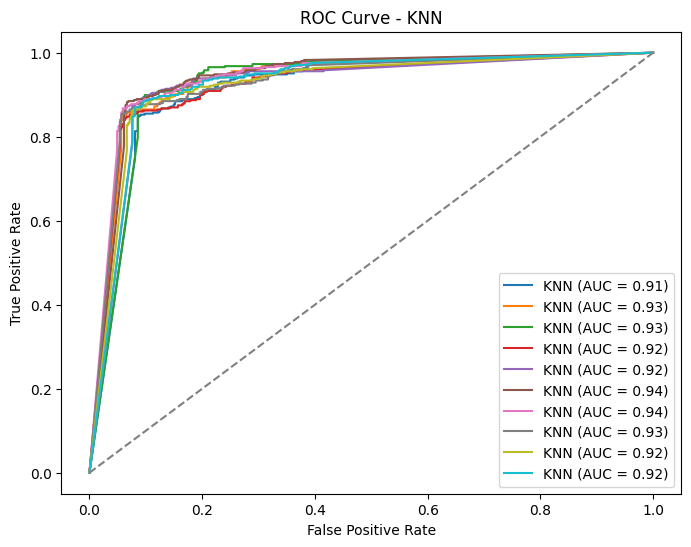

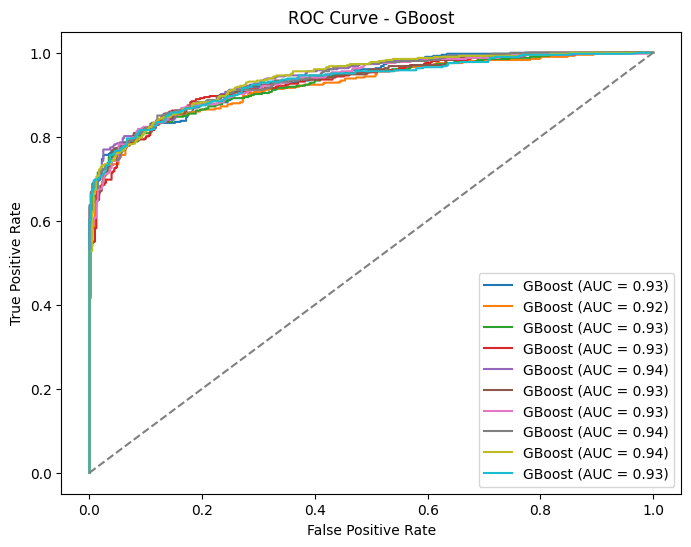

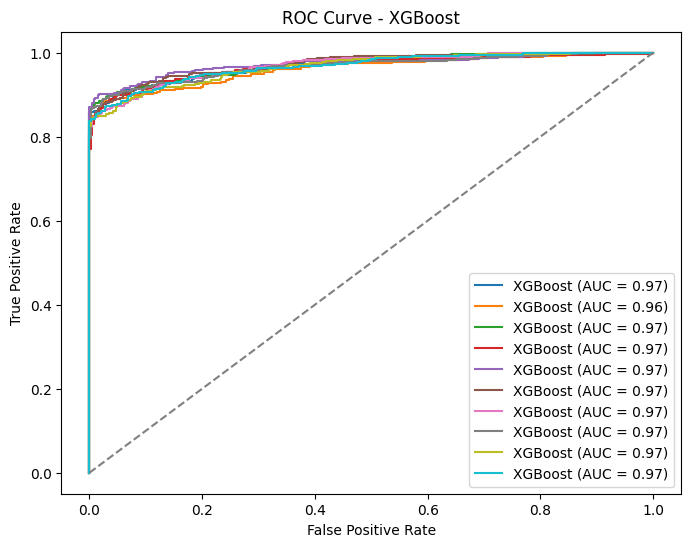

[LightGBM] [Info] Number of positive: 4074, number of negative: 4074
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1631
[LightGBM] [Info] Number of data points in the train set: 8148, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

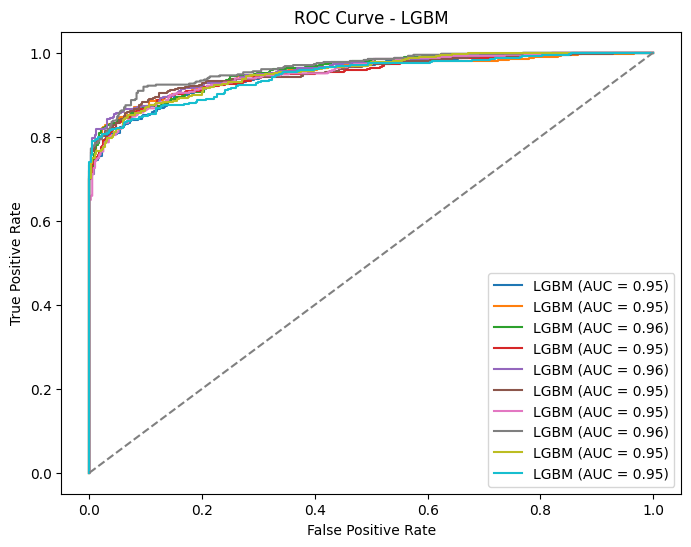

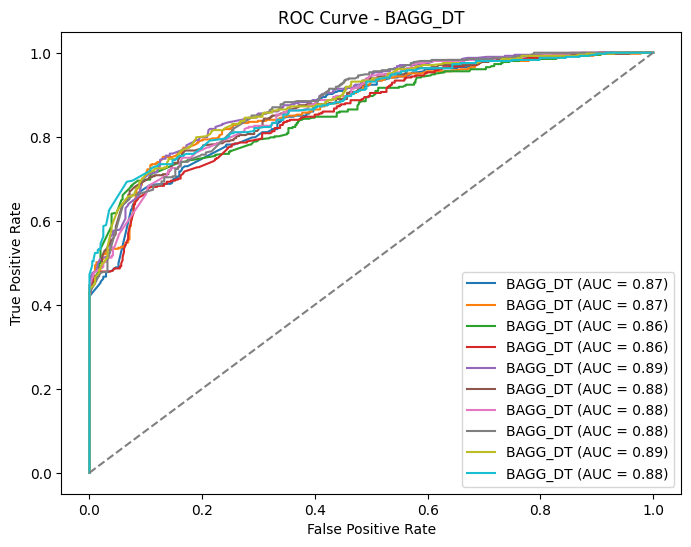

In [22]:
# Run training, cross-validation and testing
cv_results = cross_validate_models(models, X_train_scal, y_train_smote, X_test_scal, y_test, cv, scoring)

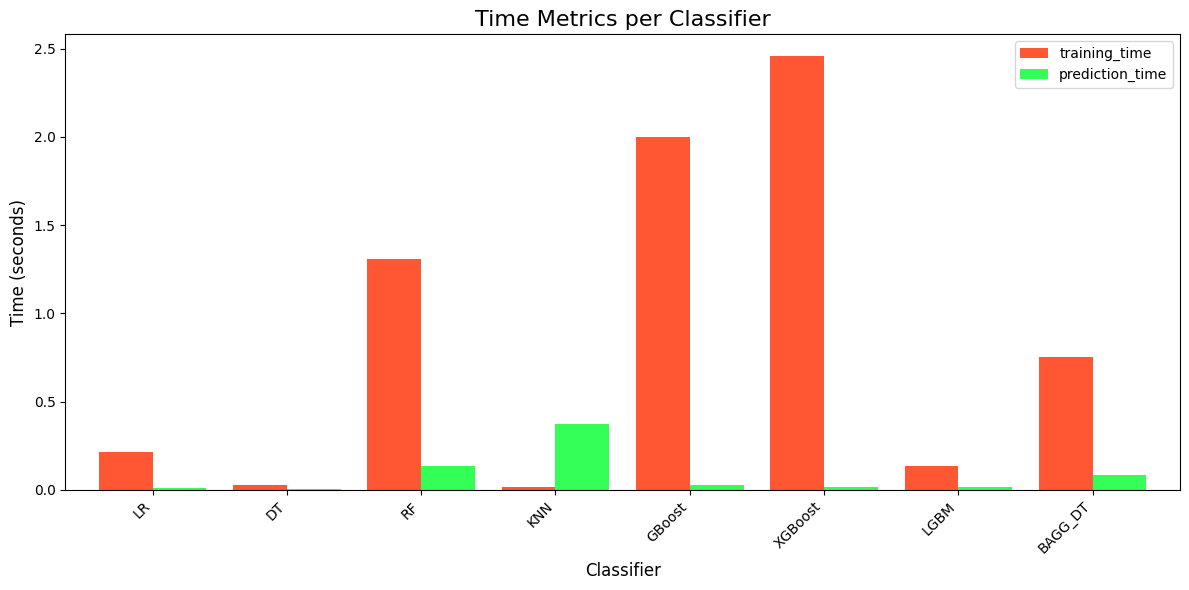

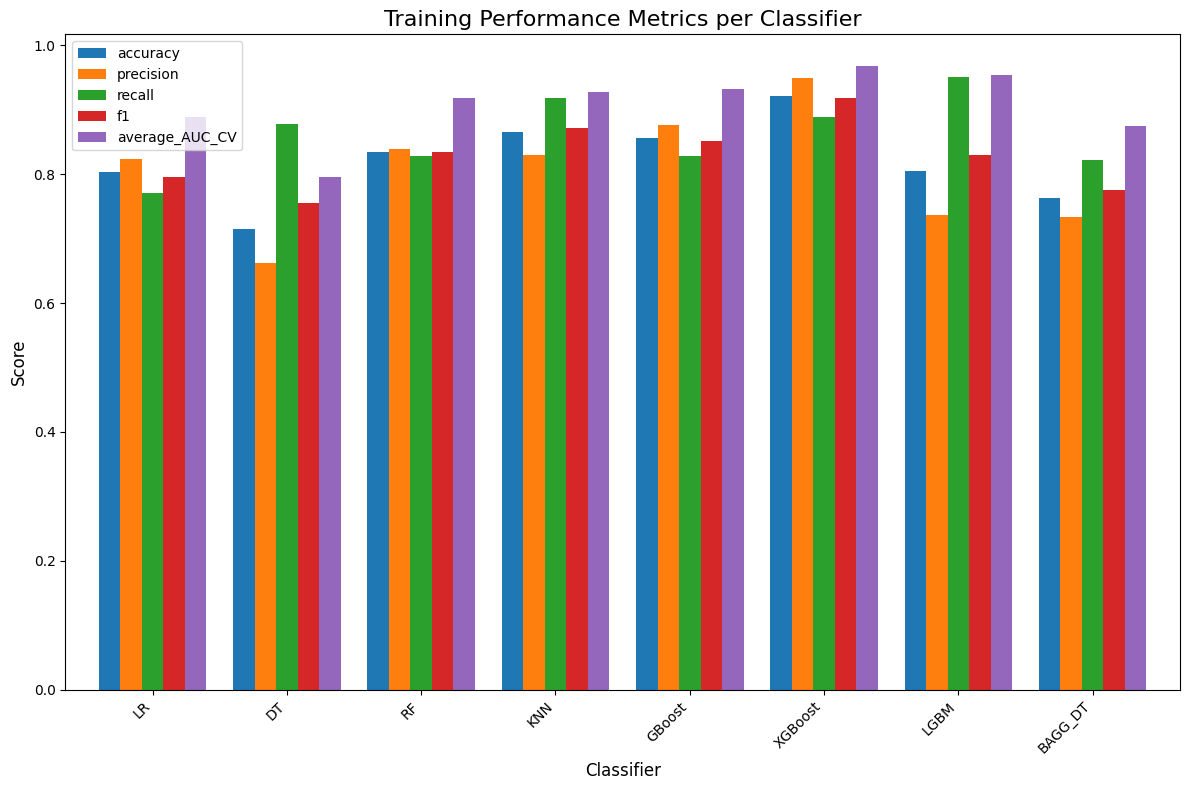

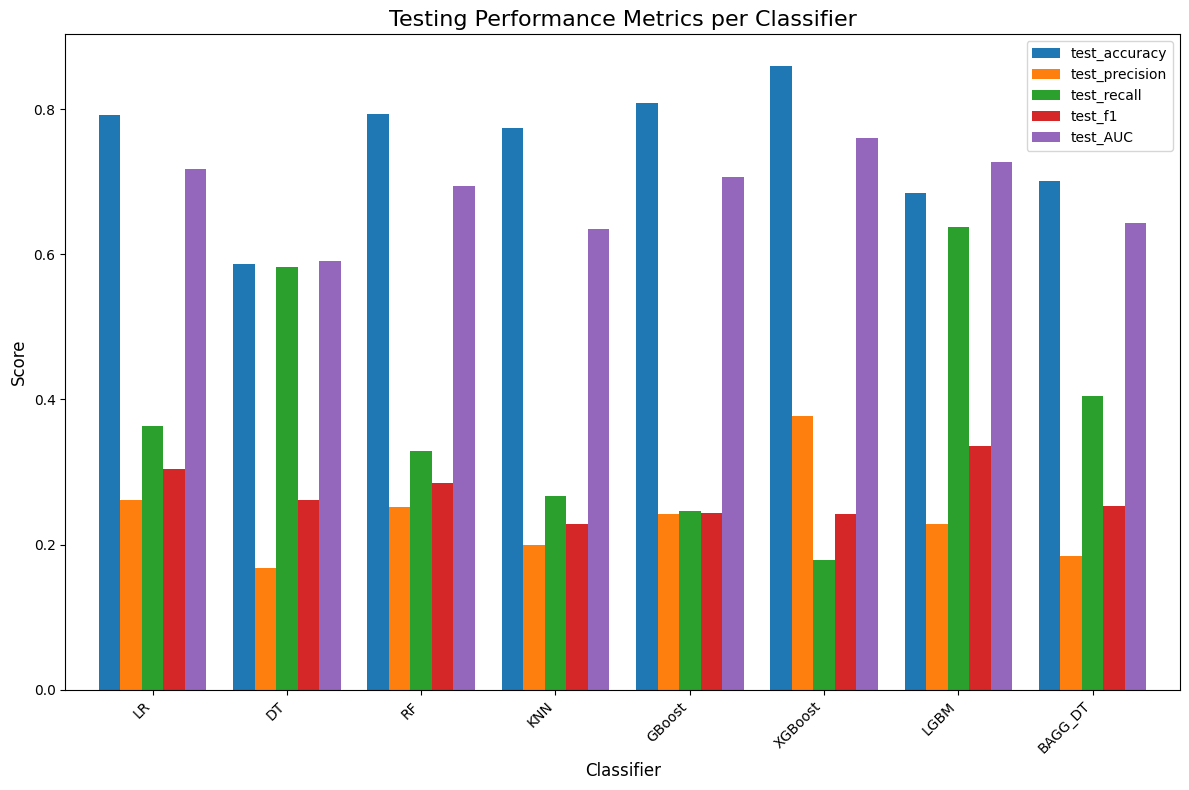

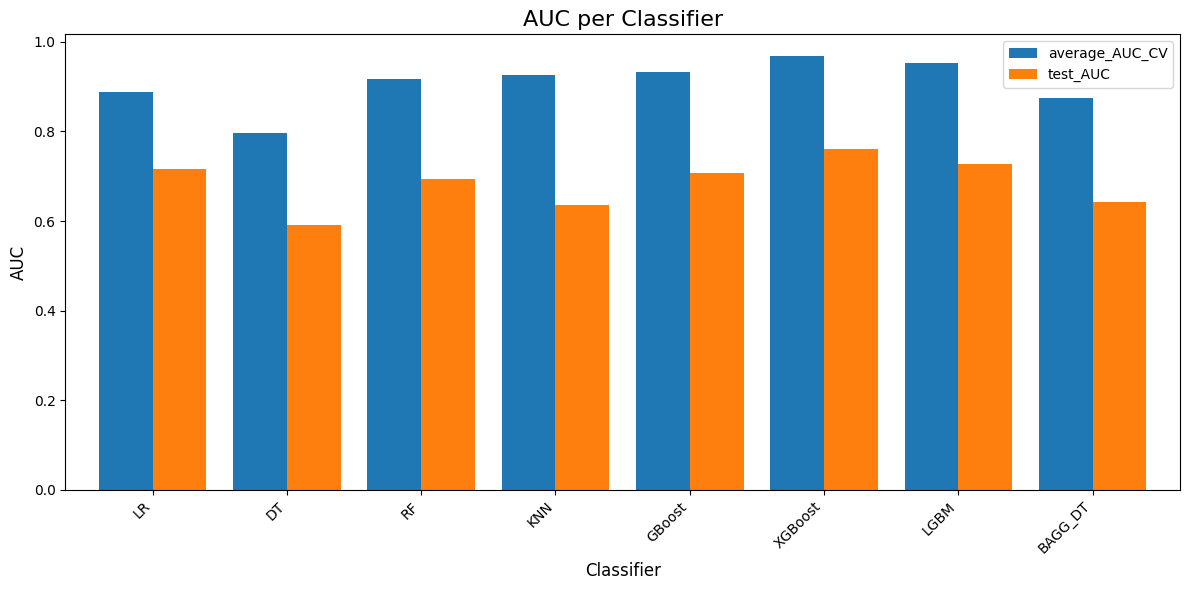

Model  training_time  prediction_time  accuracy  precision    recall  \
0       LR       0.212645         0.008610  0.802895   0.823932  0.770752   
1       DT       0.029205         0.004691  0.715390   0.662768  0.877509   
2       RF       1.307941         0.136494  0.835053   0.838979  0.827933   
3      KNN       0.013293         0.370307  0.864997   0.830233  0.917769   
4   GBoost       1.996941         0.024052  0.855670   0.875790  0.828916   
5  XGBoost       2.458706         0.013772  0.920592   0.949054  0.889048   
6     LGBM       0.135091         0.015222  0.805598   0.737031  0.950662   
7  BAGG_DT       0.754111         0.081903  0.762276   0.734242  0.822524   

         f1  test_accuracy  test_precision  test_recall   test_f1  test_AUC  \
0  0.796306       0.791416        0.261084     0.363014  0.303725  0.717081   
1  0.755124       0.586266        0.167984     0.582192  0.260736  0.590365   
2  0.834769       0.793133        0.251309     0.328767  0.284866  0.694483   
3  0.871774       0.773391        0.198980     0.267123  0.228070  0.635353   
4  0.851601       0.808584        0.241611     0.246575  0.244068  0.706289   
5  0.918008       0.860086        0.376812     0.178082  0.241860  0.760180   
6  0.830263       0.684979        0.228501     0.636986  0.336347  0.726780   
7  0.775801       0.701288        0.184375     0.404110  0.253219  0.642710   

   average_AUC_CV  
0        0.888601  
1        0.796059  
2        0.917676  
3        0.926749  
4        0.932036  
5        0.968571  
6        0.953122  
7        0.875380

In [23]:
# Convert to DataFrame for better visualization
cv_results_df = pd.DataFrame(cv_results)

plot_model_results(cv_results_df)
cv_results_df

In [24]:
# Select the desired columns
selected_columns = cv_results_df[['Model','test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_AUC']]

selected_columns = selected_columns.round(4)

# Display the result
print(selected_columns)

     Model  test_accuracy  test_precision  test_recall  test_f1  test_AUC
0       LR         0.7914          0.2611       0.3630   0.3037    0.7171
1       DT         0.5863          0.1680       0.5822   0.2607    0.5904
2       RF         0.7931          0.2513       0.3288   0.2849    0.6945
3      KNN         0.7734          0.1990       0.2671   0.2281    0.6354
4   GBoost         0.8086          0.2416       0.2466   0.2441    0.7063
5  XGBoost         0.8601          0.3768       0.1781   0.2419    0.7602
6     LGBM         0.6850          0.2285       0.6370   0.3363    0.7268
7  BAGG_DT         0.7013          0.1844       0.4041   0.2532    0.6427


Although LGBM didn't show the best metrics in training, it showed the best balance between training and testing. Also, in testing, its recall and f1 score have the best results among all the models. So, let's proceed to Feature Selection for better implementation of this model.

### Feature Evaluation

#### Feature and Permutation Importance

[LightGBM] [Info] Number of positive: 4074, number of negative: 4074
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1631
[LightGBM] [Info] Number of data points in the train set: 8148, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

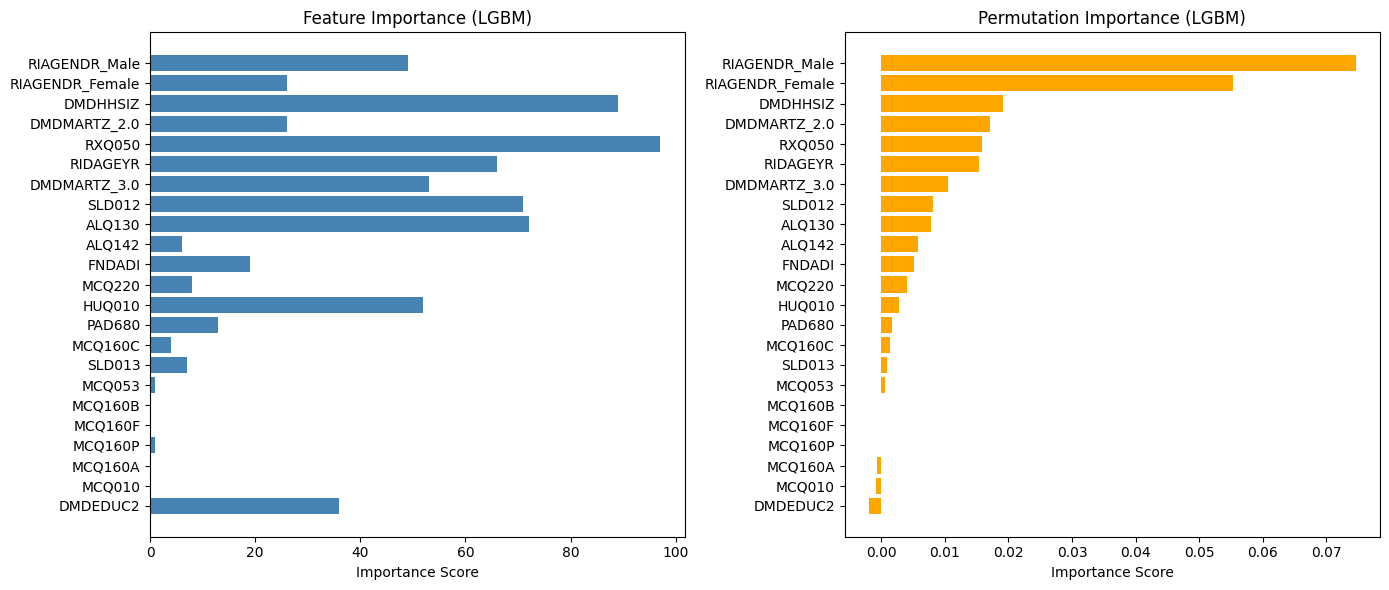

Feature  Permutation Importance  Feature Importance
4     RIAGENDR_Male                0.074592                  49
3   RIAGENDR_Female                0.055365                  26
2          DMDHHSIZ                0.019227                  89
21     DMDMARTZ_2.0                0.017082                  26
18           RXQ050                0.015794                  97
0          RIDAGEYR                0.015451                  66
22     DMDMARTZ_3.0                0.010558                  53
19           SLD012                0.008240                  71
5            ALQ130                0.007811                  72
6            ALQ142                0.005837                   6
7            FNDADI                0.005150                  19
16           MCQ220                0.004034                   8
8            HUQ010                0.002833                  52
17           PAD680                0.001717                  13
13          MCQ160C                0.001373                   4
20           SLD013                0.000858                   7
10           MCQ053                0.000601                   1
12          MCQ160B                0.000000                   0
14          MCQ160F                0.000000                   0
15          MCQ160P                0.000000                   1
11          MCQ160A               -0.000601                   0
9            MCQ010               -0.000773                   0
1          DMDEDUC2               -0.001888                  36

In [25]:
from sklearn.inspection import permutation_importance

# List of models to evaluate
selected_models = ["LGBM"]  # Ensure these exist in models dict
results = {}

# Iterate over selected models
for model_name in selected_models:
    if model_name not in models:
        raise ValueError(f"{model_name} model not found in the provided dictionary.")

    model = models[model_name]

    # Compute permutation importance
    perm_importance = permutation_importance(
        model, X_test_scal, y_test, scoring="accuracy", 
        n_repeats=10, random_state=42
    )

    # Compute feature importance (from model's built-in attribute)
    model.fit(X_train_scal, y_train_smote)  # Ensure model is trained
    if hasattr(model, "feature_importances_"):
        feature_importance = model.feature_importances_
    else:
        feature_importance = np.zeros(X_test_scal.shape[1])  # Default if not available

    # Store results in a DataFrame
    importance_df = pd.DataFrame({
        "Feature": X_test_scal.columns,
        "Permutation Importance": perm_importance.importances_mean,
        "Feature Importance": feature_importance
    })

    # Sort by feature importance
    importance_df = importance_df.sort_values(by="Permutation Importance", ascending=False)
    
    # Save results
    results[model_name] = importance_df

    # 📊 Create separate bar plots for Feature Importance and Permutation Importance
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Side-by-side plots

    # Feature Importance Plot (Left)
    axes[0].barh(importance_df["Feature"], importance_df["Feature Importance"], color="steelblue")
    axes[0].set_title(f"Feature Importance ({model_name})")
    axes[0].set_xlabel("Importance Score")
    axes[0].invert_yaxis()  # Highest importance at top

    # Permutation Importance Plot (Right)
    axes[1].barh(importance_df["Feature"], importance_df["Permutation Importance"], color="orange")
    axes[1].set_title(f"Permutation Importance ({model_name})")
    axes[1].set_xlabel("Importance Score")
    axes[1].invert_yaxis()  

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

    # Display DataFrame for the model
    display(importance_df)

In [27]:
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Create RFECV with DecisionTreeClassifier as the base estimator
selector = RFECV(estimator=DecisionTreeClassifier(), step=1, cv=StratifiedKFold(11), n_jobs=-1, min_features_to_select=10)

# Fit RFECV on the training data
X_train_rfe = selector.fit_transform(X_train_scal, y_train_smote)
X_test_rfe = selector.transform(X_test_scal)

# Keep the best hyperparameters
best_params = models['LGBM'].get_params()
model = LGBMClassifier(**best_params)  # Use the best parameters

# Train the model on selected features
model.fit(X_train_rfe, y_train_smote)

# Evaluate on test data
y_pred = model.predict(X_test_rfe)
print("Accuracy after RFECV:", accuracy_score(y_test, y_pred))

# Show selected features
selected_features = X_train_scal.columns[selector.support_]
print("Selected Features:", list(selected_features))

[LightGBM] [Info] Number of positive: 4074, number of negative: 4074
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1602
[LightGBM] [Info] Number of data points in the train set: 8148, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

#### Selecting Features

Considering the permutation importance, feature importance and scientific literature, we decided to keep the features: age, gender, marital status, education level, household size, medication use, sedentarism, weekdays sleep hours, alcohol use and presence of disabilities.

In [28]:
X_train_scal.columns

Index(['RIDAGEYR', 'DMDEDUC2', 'DMDHHSIZ', 'RIAGENDR_Female', 'RIAGENDR_Male',
       'ALQ130', 'ALQ142', 'FNDADI', 'HUQ010', 'MCQ010', 'MCQ053', 'MCQ160A',
       'MCQ160B', 'MCQ160C', 'MCQ160F', 'MCQ160P', 'MCQ220', 'PAD680',
       'RXQ050', 'SLD012', 'SLD013', 'DMDMARTZ_2.0', 'DMDMARTZ_3.0'],
      dtype='object')

In [29]:
selected_features = ["RIDAGEYR", "RIAGENDR_Female","RIAGENDR_Male","DMDMARTZ_2.0","DMDMARTZ_3.0", "DMDEDUC2", "DMDHHSIZ","RXQ050","SLD012", "ALQ130", "FNDADI", "PAD680"]

# Reduce dataset to selected features
X_train_selected = X_train_smote[selected_features]
X_test_selected = X_test[selected_features]

In [30]:
skim(X_train_selected)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 8148   │ │ float64     │ 6     │                                                          │
│ │ Number of columns │ 12     │ │ int32       │ 4     │                                                          │
│ └───────────────────┴────────┘ │ bool        │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name          ┃ NA  ┃ NA %   ┃ mean   ┃ sd     ┃ p0        ┃ p25    ┃ p50  ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ RIDAGEYR             │   0 │      0 │     51 │     18 │        20 │     35 │   53 │   66 │    80 │ ▅▆▅▅▇▆  │  │
│ │ RIAGENDR_Female      │   0 │      0 │    0.5 │    0.5 │         0 │      0 │    1 │    1 │     1 │ ▇    ▇  │  │
│ │ RIAGENDR_Male        │   0 │      0 │   0.31 │   0.46 │         0 │      0 │    0 │    1 │     1 │ ▇    ▃  │  │
│ │ DMDEDUC2             │   0 │      0 │    2.7 │    1.1 │         0 │      2 │    3 │    3 │     4 │ ▁▂ ▆▇▅  │  │
│ │ DMDHHSIZ             │   0 │      0 │    2.5 │    1.4 │         1 │    1.6 │    2 │    3 │     7 │ ▇▇▃▂▁▁  │  │
│ │ RXQ050               │   0 │      0 │    2.5 │    1.9 │         0 │   0.75 │  2.2 │  4.9 │     5 │ ▇▃▃▃▃▇  │  │
│ │ SLD012               │   0 │      0 │    7.6 │    1.6 │         2 │    6.8 │  7.7 │  8.5 │    14 │   ▂▇▇▁  │  │
│ │ ALQ130               │   0 │      0 │    2.3 │    1.9 │         0 │    1.1 │    2 │  2.6 │    15 │   ▇▂▁   │  │
│ │ FNDADI               │   0 │      0 │    0.2 │    0.4 │         0 │      0 │    0 │    0 │     1 │ ▇    ▂  │  │
│ │ PAD680               │   0 │      0 │    380 │    220 │   5.4e-79 │    240 │  360 │  480 │  1400 │  ▅▇▅▂   │  │
│ └──────────────────────┴─────┴────────┴────────┴────────┴───────────┴────────┴──────┴──────┴───────┴─────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                          ┃ true            ┃ true rate                   ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ DMDMARTZ_2.0                         │            2792 │                        0.34 │       ▇    ▅        │  │
│ │ DMDMARTZ_3.0                         │            2639 │                        0.32 │       ▇    ▃        │  │
│ └──────────────────────────────────────┴─────────────────┴─────────────────────────────┴─────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [32]:
# Applying scaler again
import os
import joblib

# Scale only numeric columns
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_selected), 
                              columns=X_train_selected.columns, 
                              index=X_train_selected.index)

# Transform the test data
X_test_scaled = pd.DataFrame(scaler.transform(X_test_selected), 
                             columns=X_test_selected.columns, 
                             index=X_test_selected.index)

save_dir = "C:/Thesis/predepression_app"  # Specify your desired directory

# Ensure the directory exists
os.makedirs(save_dir, exist_ok=True)

# Define the full path for the scaler file
scaler_filename = os.path.join(save_dir, "scaler.pkl")

# Save the scaler for app
joblib.dump(scaler, scaler_filename)

print(f"Scaler has been saved as '{scaler_filename}'.")

Scaler has been saved as 'C:/Thesis/predepression_app\scaler.pkl'.


In [33]:
X_train_scaled.dtypes

RIDAGEYR           float64
RIAGENDR_Female    float64
RIAGENDR_Male      float64
DMDMARTZ_2.0       float64
DMDMARTZ_3.0       float64
DMDEDUC2           float64
DMDHHSIZ           float64
RXQ050             float64
SLD012             float64
ALQ130             float64
FNDADI             float64
PAD680             float64
dtype: object

### Tunning Hyperparameters

In [34]:
# Tunning Hyperparameters for LGBM
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb

# Create LGBM model
lgbm_model = lgb.LGBMClassifier()

# Define parameter grid
param_grid_lgbm = {
    'scale_pos_weight': [1, 3, 5, 10],  # Handling class imbalance
    'num_leaves': [30, 50, 100, 150],  
    'max_depth': [-1, 3, 5, 10],  
    'learning_rate': [0.005, 0.01, 0.03, 0.05, 0.1],  
    'n_estimators': [100, 200, 300, 500],  
    'subsample': [0.6, 0.8, 1.0],  
    'colsample_bytree': [0.6, 0.8, 1.0],  
    'min_child_samples': [5, 10, 20, 50],  
    'reg_alpha': [0, 0.01, 0.1, 1],  
    'reg_lambda': [0, 0.01, 0.1, 1]  
}

# RandomizedSearchCV to find the best hyperparameters
random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm_model, 
    param_distributions=param_grid_lgbm, 
    n_iter=50, 
    scoring=['recall', 'f1_weighted'],  # Focus on Recall & f1
    refit='recall',  # Prioritize Recall
    cv=3, 
    verbose=2, 
    random_state=42
)

random_search_lgbm.fit(X_train_selected, y_train_smote)

# Best hyperparameters LGBM
print("Best Hyperparameters for LGBM:", random_search_lgbm.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 2716, number of negative: 2716
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1346
[LightGBM] [Info] Number of data points in the train set: 5432, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [35]:
# Update models hyperparameters
models_tunned = {
    "LGBM": LGBMClassifier(n_estimators=300, max_depth=3, subsample=0.8, learning_rate=0.03, colsample_bytree=0.8, scale_pos_weight=3,
                           class_weight="balanced", boosting_type="gbdt", random_state=42),
    "LGBM_2": LGBMClassifier(n_estimators=100, max_depth=3, subsample=1.0, learning_rate=0.01, colsample_bytree=0.6, scale_pos_weight=5,
                             num_leaves=50, min_child_samples=10, reg_lambda=0.01, reg_alpha=0.1,
                           class_weight="balanced", boosting_type="gbdt", random_state=42)
}

In [36]:
# Update code to train, validate, early stop and test the models

import time
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, roc_curve, make_scorer)
from lightgbm import early_stopping

# Define Stratified K-Fold Cross-Validation (10 folds)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define scoring metrics (excluding AUC for now, since we will calculate it separately)
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=1),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

def plot_roc_curve(model, X_test, y_test, model_name):
    """
    Plots the ROC curve for a single model.
    """
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
    else:
        return  # If no probability or decision function, skip ROC curve
    
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc_score = roc_auc_score(y_test, y_scores)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

def train_validate_test_models(models, X, y, X_test, y_test, cv, scoring):
    results = []

    for name, model in models.items():
        model_results = {
            'Model': name
        }
        auc_scores = []
        all_metrics = {metric: [] for metric in scoring.keys()}  # For storing metrics

        # Measure training time
        start_train = time.time()

        # Check if model is LGBM and apply early stopping
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
        model.fit(
            X_train, y_train,
            eval_set=[(X_val, y_val)],
            eval_metric='logloss',
            callbacks=[early_stopping(stopping_rounds=50)])

        end_train = time.time()
        training_time = end_train - start_train

        # Measure prediction time
        start_pred = time.time()
        y_pred = model.predict(X)
        end_pred = time.time()
        prediction_time = end_pred - start_pred

        # Store timings
        model_results['training_time'] = training_time
        model_results['prediction_time'] = prediction_time

        # Compute cross-validation scores
        for metric, scorer in scoring.items():
            try:
                scores = cross_val_score(model, X, y, cv=cv, scoring=scorer)
                model_results[metric] = np.mean(scores)  # Store average score
            except Exception:
                model_results[metric] = np.nan

        # Evaluate on the test set after training
        evaluate_test_set(model, X_test, y_test, model_results)

        # Initialize ROC curve plot
        plt.figure(figsize=(8, 6))

        # Compute AUC Score separately for cross-validation
        for fold, (train_idx, test_idx) in enumerate(cv.split(X, y), 1):
            X_train, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]

            model.fit(X_train, y_train)

            # Check if the model supports probability or decision function
            if hasattr(model, "predict_proba"):
                y_scores = model.predict_proba(X_test_fold)[:, 1]
            elif hasattr(model, "decision_function"):
                y_scores = model.decision_function(X_test_fold)
            else:
                y_scores = None  

            if y_scores is not None:
                auc = roc_auc_score(y_test_fold, y_scores)
                auc_scores.append(auc)

                # Plot ROC curve for each fold
                plot_roc_curve(model, X_test_fold, y_test_fold, name)

        # Compute average AUC
        model_results['average_AUC_CV'] = np.mean(auc_scores) if auc_scores else np.nan

        # Finalize ROC curve plot
        plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Baseline
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - {name}")
        plt.legend(loc="lower right")
        plt.show()

        # Add model results to the list
        results.append(model_results)

    # Create a DataFrame for comparison
    results_df = pd.DataFrame(results)

    # Ensure that the 'Model' column is the first column
    results_df = results_df[['Model'] + [col for col in results_df.columns if col != 'Model']]

    return results_df

def evaluate_test_set(model, X_test, y_test, model_results):
    # Make predictions
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, zero_division=1)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    # AUC score is only available if we have probability predictions
    auc = roc_auc_score(y_test, y_test_prob) if y_test_prob is not None else np.nan

    # Store the test set evaluation results in the model_results
    model_results['test_accuracy'] = accuracy
    model_results['test_precision'] = precision
    model_results['test_recall'] = recall
    model_results['test_f1'] = f1
    model_results['test_AUC'] = auc

### Retrain and Retest Models after Feature Selection and Hyperparameters Tunning

[LightGBM] [Info] Number of positive: 4074, number of negative: 4074
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1354
[LightGBM] [Info] Number of data points in the train set: 8148, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

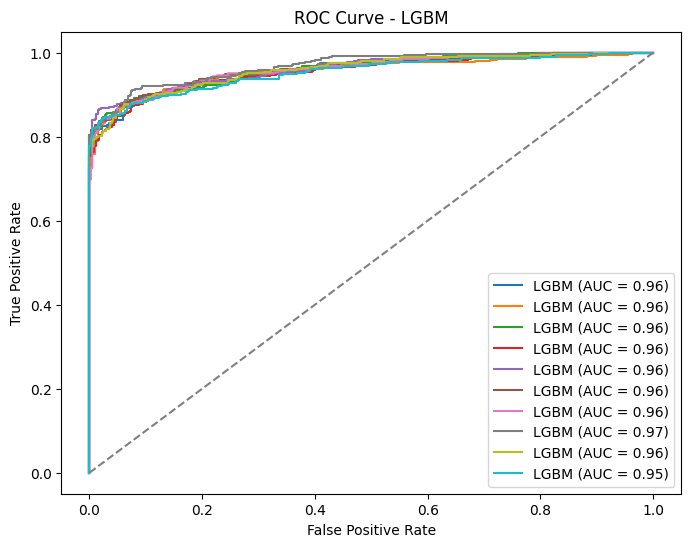

[LightGBM] [Info] Number of positive: 4074, number of negative: 4074
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1354
[LightGBM] [Info] Number of data points in the train set: 8148, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

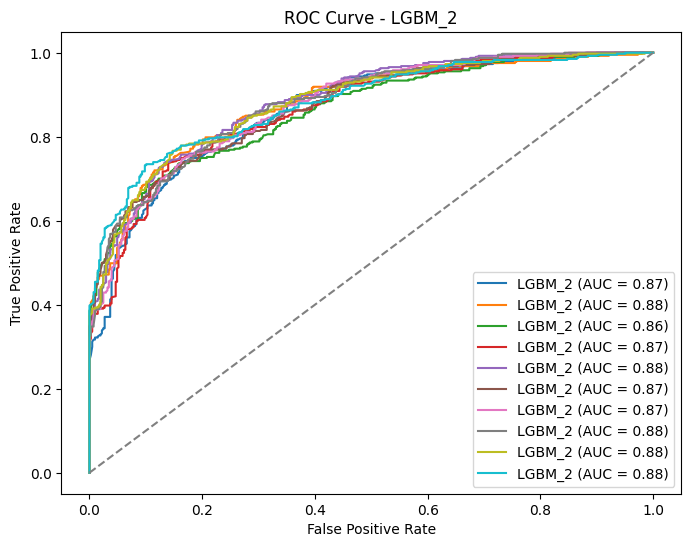

In [37]:
# Run cross-validation
cv_results_selected = cross_validate_models(models_tunned, X_train_scaled, y_train_smote, X_test_scaled, y_test, cv, scoring)

# Convert to DataFrame for better visualization
cv_results_selected_df = pd.DataFrame(cv_results_selected)

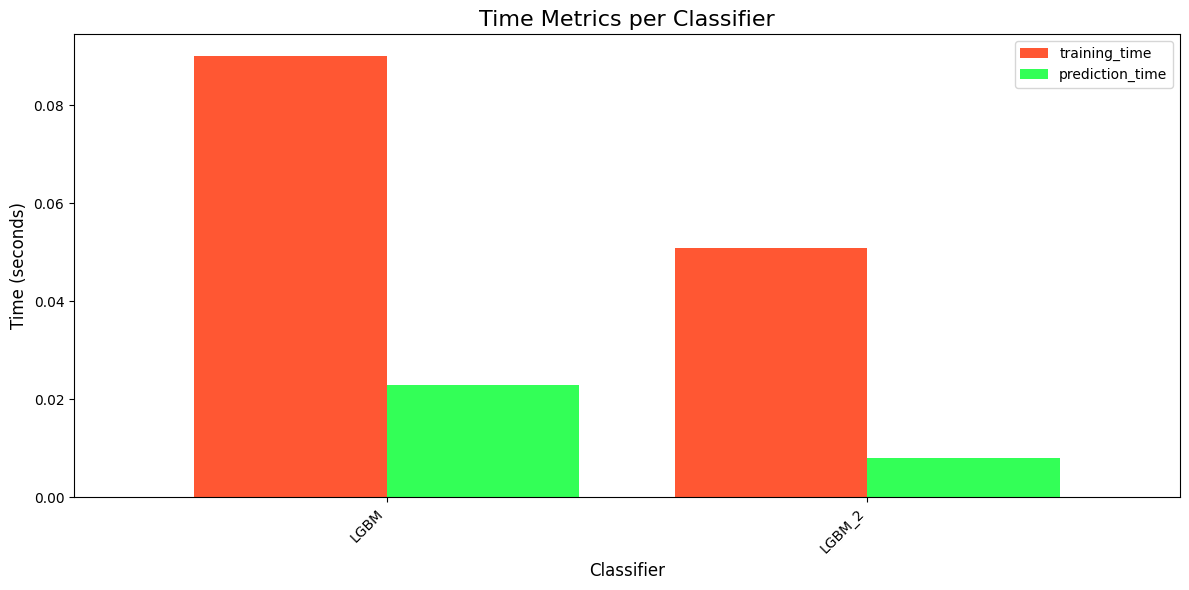

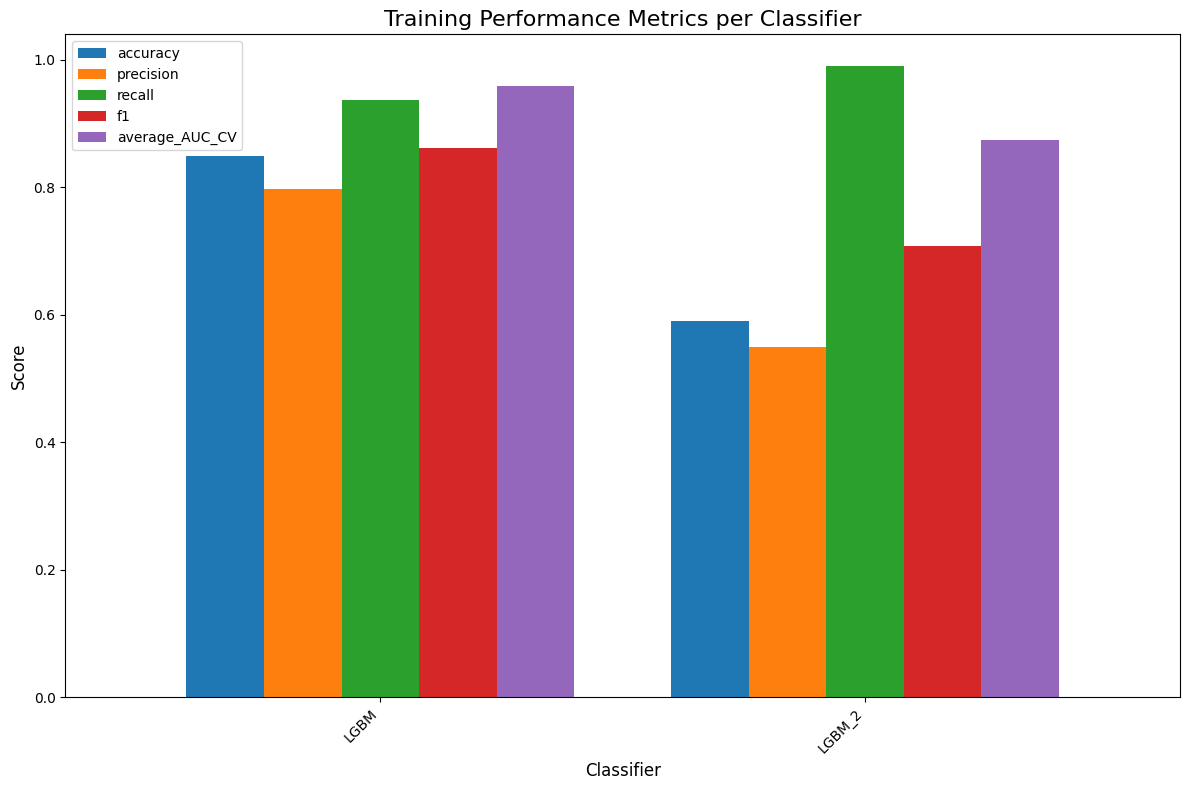

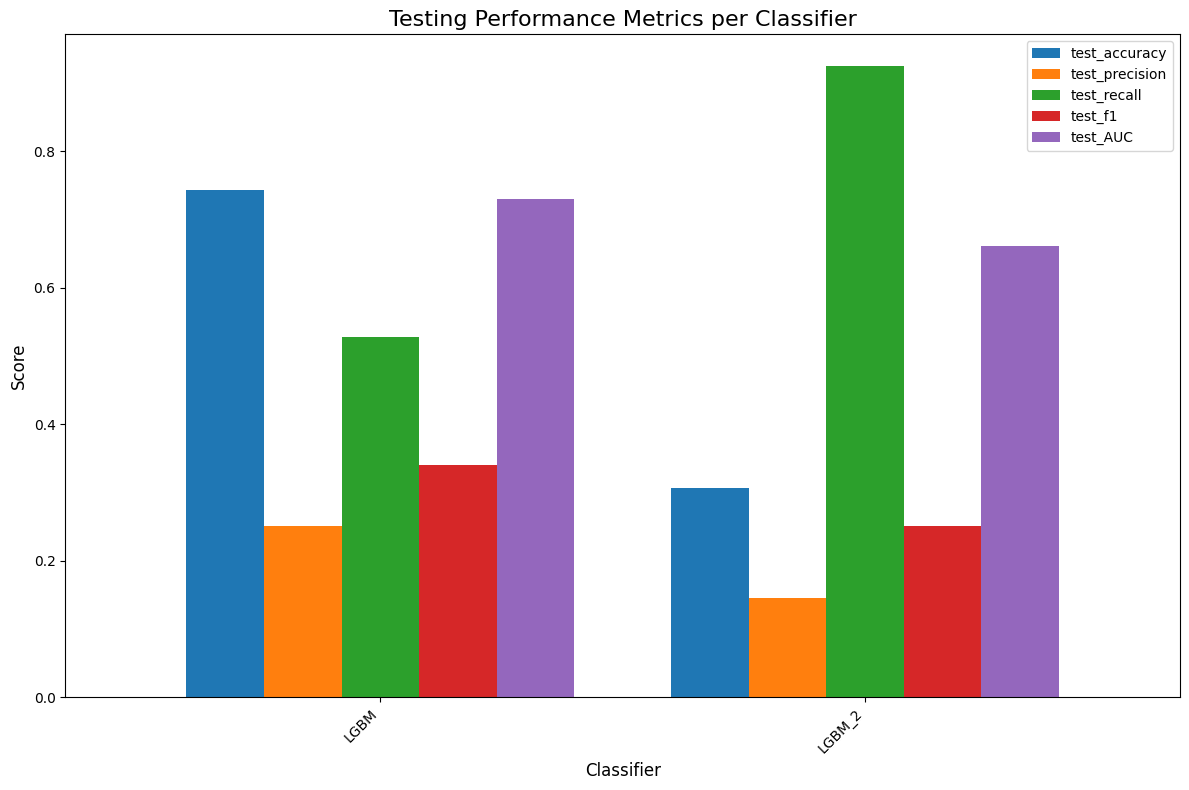

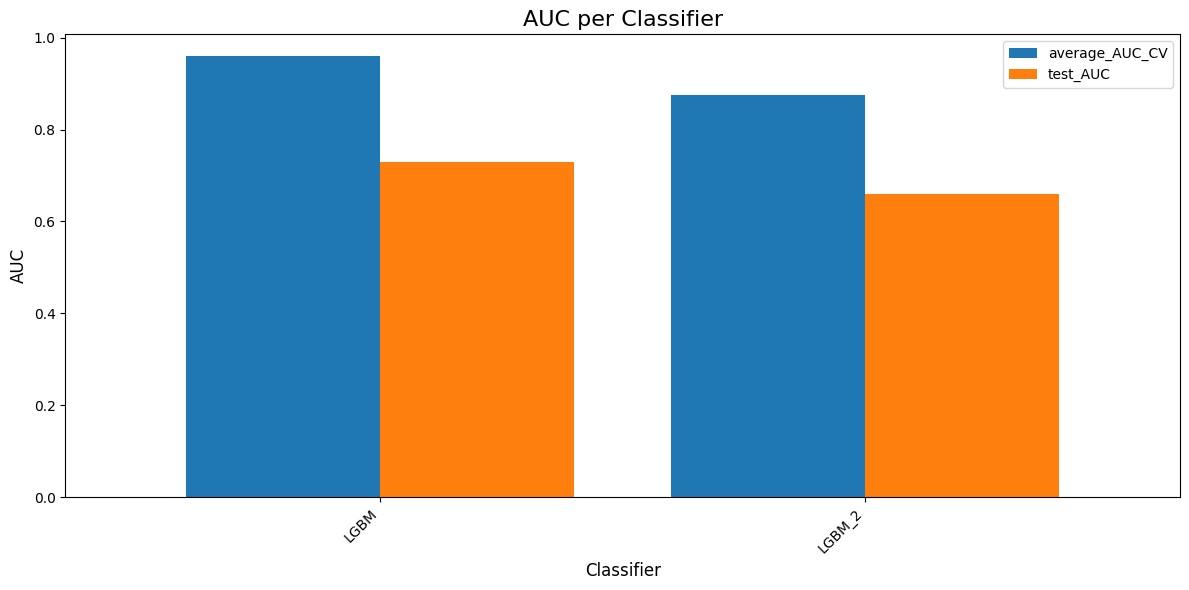

Model  training_time  prediction_time  accuracy  precision    recall  \
0    LGBM       0.090000         0.022998  0.849409   0.797913  0.935930   
1  LGBM_2       0.050853         0.008014  0.589591   0.549827  0.990177   

         f1  test_accuracy  test_precision  test_recall   test_f1  test_AUC  \
0  0.861407       0.743348        0.250814     0.527397  0.339956  0.730007   
1  0.707022       0.306438        0.144850     0.924658  0.250464  0.660401   

   average_AUC_CV  
0        0.959147  
1        0.874629

In [38]:
plot_model_results(cv_results_selected_df)
cv_results_selected_df

Plotting Precision-Recall curve for model: LGBM


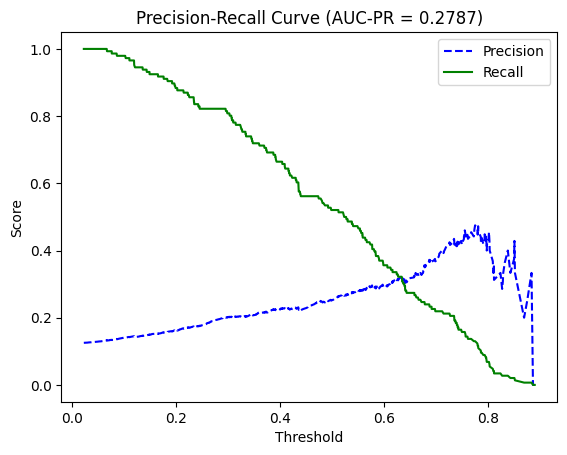

In [39]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

def plot_precision_recall_curve_with_auc(model, X_test, y_test):
    # Get probabilities
    y_probs = model.predict_proba(X_test)[:, 1]

    # Compute precision-recall curve
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

    # Compute AUC-PR
    auc_pr = average_precision_score(y_test, y_probs)
    
    # Plot the curve
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title(f"Precision-Recall Curve (AUC-PR = {auc_pr:.4f})")
    plt.legend()
    plt.show()
    
    return auc_pr

# Step 1: Select the top 2 models based on Test F1 Score
best_models_df = cv_results_selected_df.nlargest(1, ['test_f1'])  # Select top model

# Step 2: Iterate over the selected models, retrieve and evaluate each
for index, row in best_models_df.iterrows():
    # Get the model name and trained model
    model_name = row['Model']
    model = models_tunned[model_name]  # Assuming models_tunned holds the trained models
    
    # Step 3: Apply the plot function for each of the top 2 models
    print(f"Plotting Precision-Recall curve for model: {model_name}")
    plot_precision_recall_curve_with_auc(model, X_test_scaled, y_test)

In [40]:
model

LGBMClassifier(class_weight='balanced', colsample_bytree=0.8,
               learning_rate=0.03, max_depth=3, n_estimators=300,
               random_state=42, scale_pos_weight=3, subsample=0.8)

In [41]:
#Metrics to Export
metrics_export = cv_results_selected_df[:1]
metrics_export.to_pickle("C:/Thesis/predepression_app/model_metrics.pkl")

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, X_test, y_test):
    """
    This function takes a trained model, test data, and true labels, 
    then plots the ROC curve and highlights the AUC.
    
    Parameters:
    - model: Trained classifier model
    - X_test: Test features
    - y_test: True labels for the test set
    """
    # Get predicted probabilities (assumes binary classification)
    y_probs = model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    
    # Calculate AUC
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.fill_between(fpr, tpr, color='skyblue', alpha=0.3)  # Highlight the area under the curve
    
    # Plot random classifier line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
    
    # Set plot limits
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    # Add labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.savefig("C:/Thesis/predepression_app/ROC_plot.png")
    # Show plot
    plt.show()

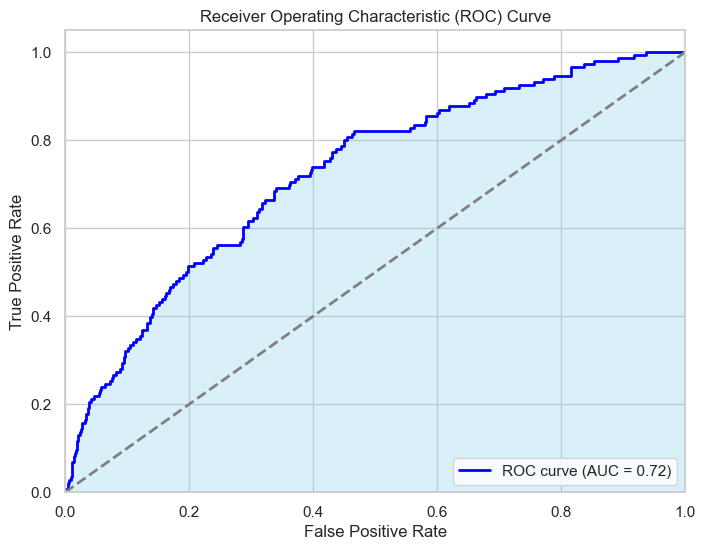

In [76]:
plot_roc_curve(model, X_test_scaled, y_test)

In [44]:
# Create DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame({
    "Feature": X_train_selected.columns,  # Make sure X_train_selected is used
    "Importance": model.feature_importances_
})

# Sort by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Display the DataFrame
print(feature_importance_df)

            Feature  Importance
6          DMDHHSIZ         343
8            SLD012         266
9            ALQ130         266
7            RXQ050         262
0          RIDAGEYR         255
2     RIAGENDR_Male         132
11           PAD680         124
5          DMDEDUC2         112
4      DMDMARTZ_3.0         107
10           FNDADI          87
1   RIAGENDR_Female          71
3      DMDMARTZ_2.0          68


In [45]:
import numpy as np
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix

# Predict probabilities
y_prob = model.predict_proba(X_test_selected)[:, 1]  # Get probability for the positive class (1)

# Set custom threshold for classification (lower threshold to increase recall)
threshold = 0.5
y_pred_custom = (y_prob >= threshold).astype(int)

# Evaluate recall and other metrics
recall = recall_score(y_test, y_pred_custom)
accuracy = accuracy_score(y_test, y_pred_custom)
conf_matrix = confusion_matrix(y_test, y_pred_custom)

print(f"Recall with threshold {threshold}: {recall}")
print(f"Accuracy with threshold {threshold}: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

Recall with threshold 0.5: 0.2671232876712329
Accuracy with threshold 0.5: 0.8025751072961373
Confusion Matrix:
[[896 123]
 [107  39]]


In [46]:
for threshold in [0.5, 0.4, 0.3, 0.2, 0.1]:
    y_pred_custom = (y_prob >= threshold).astype(int)
    recall = recall_score(y_test, y_pred_custom)
    precision = precision_score(y_test, y_pred_custom)
    f1 = f1_score(y_test, y_pred_custom)
    print(f"Threshold: {threshold:.2f} | Recall: {recall:.3f} | Precision: {precision:.3f} | F1: {f1:.3f}")

Threshold: 0.50 | Recall: 0.267 | Precision: 0.241 | F1: 0.253
Threshold: 0.40 | Recall: 0.370 | Precision: 0.226 | F1: 0.281
Threshold: 0.30 | Recall: 0.562 | Precision: 0.189 | F1: 0.283
Threshold: 0.20 | Recall: 0.808 | Precision: 0.139 | F1: 0.237
Threshold: 0.10 | Recall: 0.904 | Precision: 0.143 | F1: 0.247


### Select and Export Models

In [ ]:
'''
import pickle
import os

# Step 1: specify the directory to salve the models
save_dir = "C:/Thesis/predepression_app"  # Specify your desired directory

# Ensure the directory exists
os.makedirs(save_dir, exist_ok=True)

# Step 2: Retrieve the best models from the models dictionary
top_models = {}
for idx, row in best_models_df.iterrows():
    model_name = row['Model']
    top_models[model_name] = models_tunned[model_name]

for model_name, model in top_models.items():
    filename = os.path.join(save_dir, f"best_model.pkl")  # Full path
    with open(filename, 'wb') as model_file:
        pickle.dump(model, model_file)
    print(f"Model '{model_name}' has been saved as '{filename}'.")

# Step 4: Print the metrics for the top 2 models
print("\nTop Models Based on Test Recall and Test F1:\n")
print(best_models_df.to_string(index=False))  # Displays table without the default index
'''

In [47]:
import pickle
import os

#import sys
#sys.path.append("C:/Thesis/predepression_app")
#from utils.model_utils import ThresholdModelWrapper

# Step 1: specify the directory to salve the models
save_dir = "C:/Thesis/predepression_app"  # Specify your desired directory

# Ensure the directory exists
os.makedirs(save_dir, exist_ok=True)

# Step 2: Retrieve the best models from the models dictionary
top_models = {}
for idx, row in best_models_df.iterrows():
    model_name = row['Model']
    top_models[model_name] = models_tunned[model_name]

custom_threshold = 0.3  # Choose the best threshold based on your previous test

for model_name, model in top_models.items():
    #wrapped_model = ThresholdModelWrapper(model, threshold=0.3)
    filename = os.path.join(save_dir, f"{model_name}.pkl")
    
    with open(filename, 'wb') as model_file:
        pickle.dump(model, model_file)

    print(f"Model '{model_name}' with custom threshold has been saved as '{filename}'.")

Model 'LGBM' with custom threshold has been saved as 'C:/Thesis/predepression_app\LGBM.pkl'.


### Prediction Task

Predict the probability of depression with person's suitable data

In [48]:
# Step 1: Load the saved model from the pickle file
with open('C:/Thesis/predepression_app/LGBM.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [49]:
X_train_scaled.sample(5)

RIDAGEYR  RIAGENDR_Female  RIAGENDR_Male  DMDMARTZ_2.0  DMDMARTZ_3.0  \
4605  0.983333              0.0            1.0           1.0           0.0   
7259  0.707794              0.0            1.0           0.0           1.0   
3793  0.050000              1.0            0.0           0.0           0.0   
3606  0.916667              0.0            1.0           0.0           0.0   
6676  0.843343              1.0            0.0           1.0           0.0   

      DMDEDUC2  DMDHHSIZ    RXQ050    SLD012    ALQ130  FNDADI    PAD680  
4605      1.00  0.000000  0.200000  0.625000  0.000000     0.0  0.043478  
7259      0.75  0.306083  0.922433  0.418410  0.185045     1.0  0.695652  
3793      1.00  0.166667  0.800000  0.416667  0.066667     0.0  0.260870  
3606      1.00  0.166667  1.000000  0.500000  0.000000     0.0  0.260870  
6676      0.75  0.000000  0.869971  0.583333  0.043343     0.0  0.217391

In [50]:
X_train_scaled.dtypes

RIDAGEYR           float64
RIAGENDR_Female    float64
RIAGENDR_Male      float64
DMDMARTZ_2.0       float64
DMDMARTZ_3.0       float64
DMDEDUC2           float64
DMDHHSIZ           float64
RXQ050             float64
SLD012             float64
ALQ130             float64
FNDADI             float64
PAD680             float64
dtype: object

In [51]:
# Preprocessing Function
def preprocess_input(data, scaler=None):
    """
    Transforms raw user input into the required format for model prediction, including normalization.
    """
    # One-hot encoding for gender
    data['RIAGENDR_Female'] = 1 if data['gender'] == 'Female' else 0
    data['RIAGENDR_Male'] = 1 if data['gender'] == 'Male' else 0

    # One-hot encoding for marital status
    data['DMDMARTZ_2.0'] = 1 if data['marital_status'] == 'Divorced' else 0
    data['DMDMARTZ_3.0'] = 1 if data['marital_status'] == 'Never Married' else 0

    # Map education level to numbers
    education_mapping = {
        'No schooling completed': 0,
        'Some high school': 1,
        'High school graduate': 2,
        'Some college or AA degree': 3,
        'Bachelor’s degree': 4,
        'Graduate or professional degree': 5
    }
    data['DMDEDUC2'] = education_mapping.get(data['education_level'])  # -1 if unknown

    # Boolean conversion for disabilities
    data['FNDADI'] = 1 if data['disabilities'] == 'Yes' else 0

    # Selecting only relevant columns
    input_features = ['RIDAGEYR', 'RIAGENDR_Female', 'RIAGENDR_Male', 'DMDMARTZ_2.0', 'DMDMARTZ_3.0', 'DMDEDUC2',
                      'DMDHHSIZ', 'RXQ050', 'SLD012', 'ALQ130', 'FNDADI', 'PAD680']

    # Convert to DataFrame to ensure the proper format
    df = pd.DataFrame(scaler.transform(pd.DataFrame([data], columns=input_features)), 
                  columns=input_features, dtype=float)

    return df

In [52]:
# Simulating a new user input from a form
new_data = {
    'RIDAGEYR': 30,  # Age
    'gender': 'Female',  # Gender
    'marital_status': 'Divorced',  # Marital status
    'education_level': 'Some college or AA degree',  # Education level (newly added)
    'DMDHHSIZ': 5,  # Household size
    'RXQ050': 4,  # Count of medications
    'SLD012': 5.5,  # Sleep hours
    'ALQ130': 12,  # Alcohol use
    'disabilities': 'Yes',  # Disabilities (converted to boolean)
    'PAD680': 360  # Minutes of daily sedentarism
}

# Process the new user input
processed_data = preprocess_input(new_data, scaler=scaler)

# Display the preprocessed data
print(processed_data)


   RIDAGEYR  RIAGENDR_Female  RIAGENDR_Male  DMDMARTZ_2.0  DMDMARTZ_3.0  \
0  0.166667              1.0            0.0           1.0           0.0   

   DMDEDUC2  DMDHHSIZ  RXQ050    SLD012  ALQ130  FNDADI   PAD680  
0      0.75  0.666667     0.8  0.291667     0.8     1.0  0.26087  


In [53]:
def get_prediction_with_probabilities(model, processed_data):
    """
    Given a trained model and processed input data, this function returns 
    the predicted class, class probabilities, and confidence of the prediction.
    
    Parameters:
    - model: Trained machine learning model (with predict and predict_proba methods).
    - processed_data: Preprocessed input data in the correct format for the model.
    
    Returns:
    - predicted_class (int): The predicted class.
    - probabilities (array): Probabilities of all classes.
    - confidence (float): Probability of the predicted class.
    """
    # Get predicted class
    prediction = model.predict(processed_data)
    predicted_class = int(prediction[0])  # Ensure it's an integer

    # Get class probabilities
    probabilities = model.predict_proba(processed_data)

    # Get confidence of predicted class
    confidence = probabilities[0][predicted_class]  

    return predicted_class, probabilities[0], confidence

In [54]:
def plot_class_probabilities(probabilities):
    """
    Given the class probabilities, this function plots a bar chart.
    
    Parameters:
    - probabilities: The probabilities for each class (array-like).
    """
    # Class labels (adjust these based on your model's classes)
    class_labels = ['Non-Depression', 'Depression']

    # Create a bar chart
    plt.figure(figsize=(6, 4))
    plt.bar(class_labels, probabilities, color=['blue', 'green'])

    # Add title and labels
    plt.title('Class Probabilities')
    plt.xlabel('Classes')
    plt.ylabel('Probability')

    # Show the chart
    plt.show()

Predicted class: 1
Class probabilities: [0.11927695 0.88072305]
Confidence: 0.88


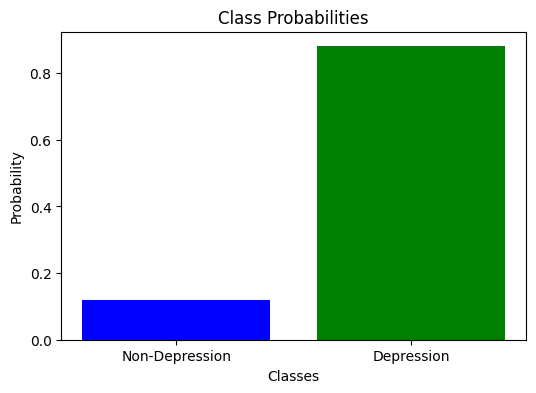

In [55]:
# Example usage
predicted_class, probabilities, confidence = get_prediction_with_probabilities(loaded_model, processed_data)

print(f"Predicted class: {predicted_class}")
print(f"Class probabilities: {probabilities}")
print(f"Confidence: {confidence:.2f}")

# Plot the class probabilities
plot_class_probabilities(probabilities)

In [56]:
# Assuming 'model' is your trained LGBMClassifier and X_train_selected is your training data

# Calculate the feature importance from the trained LGBM model
feature_importance = model.feature_importances_

# Create a copy of the feature names
feature_names = X_train_selected.columns

# Initialize grouped_features with empty lists for each group
grouped_features = {
    'Biological Sex': ['RIAGENDR_Female', 'RIAGENDR_Male'],
    'Marriage Status': ['DMDMARTZ_2.0', 'DMDMARTZ_3.0'],
    'Age': ['RIDAGEYR'],
    'Education Level': ['DMDEDUC2'],
    'Household Size': ['DMDHHSIZ'],
    'Medication Use': ['RXQ050'],
    'Sleep Habits': ['SLD012'],
    'Alcohol Use': ['ALQ130'],
    'Disabilities': ['FNDADI'],
    'Sedentarism': ['PAD680']
    # Add other one-hot encoded columns here if needed
}

# Calculate the summed importance for each group
grouped_importance = {}
for group, features in grouped_features.items():
    importance_sum = np.sum([feature_importance[np.where(feature_names == feature)[0][0]] for feature in features])
    grouped_importance[group] = importance_sum

# Sort the grouped importance in descending order
sorted_grouped_importance = {k: v for k, v in sorted(grouped_importance.items(), key=lambda item: item[1], reverse=False)}

# Convert to DataFrame for better visualization
feature_importance_model = pd.DataFrame(list(sorted_grouped_importance.items()), columns=["Feature", "Importance"])

feature_importance_model.to_pickle("C:/Thesis/predepression_app/feature_importance.pkl")

# Save as a pickle file
#with open("C:/Thesis/predepression_app/feature_importance.pkl", "wb") as f:
#    pickle.dump(sorted_grouped_importance, f)

In [57]:
feature_importance_model

Feature  Importance
0     Disabilities          87
1  Education Level         112
2      Sedentarism         124
3  Marriage Status         175
4   Biological Sex         203
5              Age         255
6   Medication Use         262
7     Sleep Habits         266
8      Alcohol Use         266
9   Household Size         343

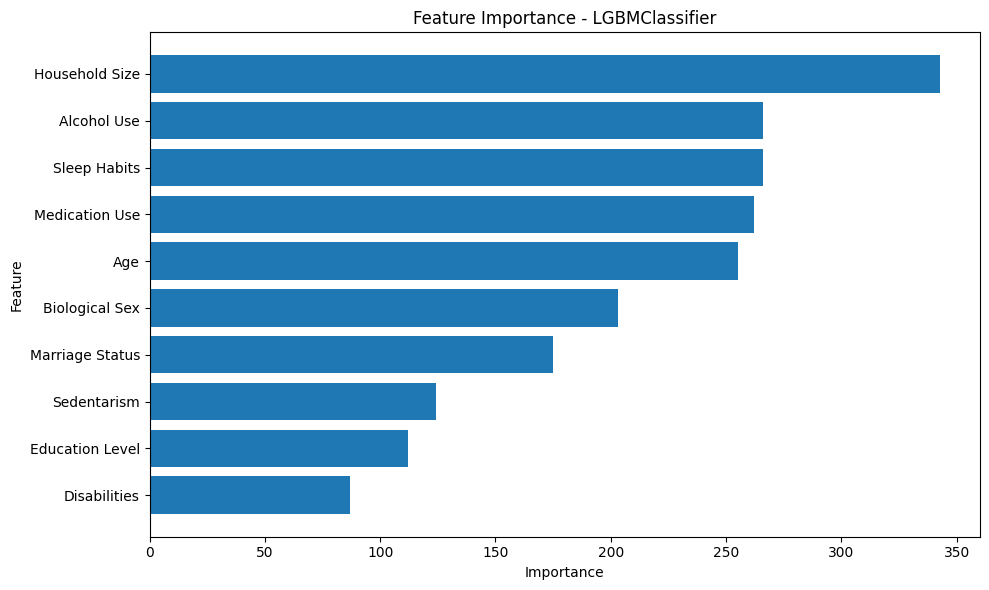

In [58]:
def plot_importance_features(df):
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.barh(list(df.keys()), list(df.values()), align='center')

    # Set labels and title
    plt.title('Feature Importance - LGBMClassifier')
    plt.xlabel('Importance')
    plt.ylabel('Feature')

    # Tight layout to ensure everything fits
    plt.tight_layout()

    # Show the plot
    plt.show()

plot_importance_features(sorted_grouped_importance)

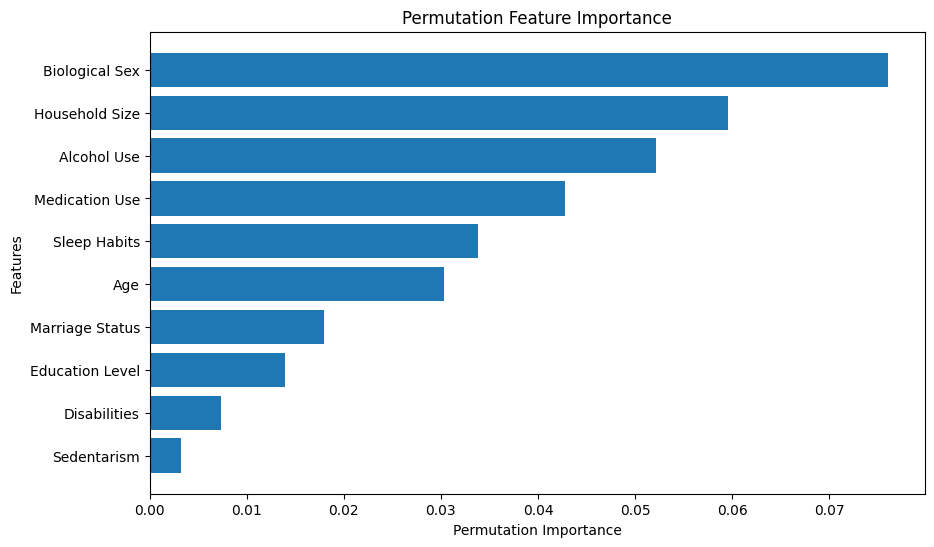

In [59]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
results = permutation_importance(loaded_model, X_train_scaled, y_train_smote, n_repeats=10, random_state=42)

# Extract importance scores
importances = results.importances_mean

# List of columns (features) in the dataset
features = X_train_scaled.columns

# Create a mapping for one-hot encoded columns to their original feature
feature_mapping = {
    'RIAGENDR_Female': 'Biological Sex',
    'RIAGENDR_Male': 'Biological Sex',
    'DMDMARTZ_2.0': 'Marriage Status',
    'DMDMARTZ_3.0': 'Marriage Status',
    'RIDAGEYR':'Age',
    'DMDEDUC2':'Education Level',
    'DMDHHSIZ':'Household Size',
    'RXQ050':'Medication Use',
    'SLD012':'Sleep Habits',
    'ALQ130':'Alcohol Use',
    'FNDADI':'Disabilities',
    'PAD680':'Sedentarism'
    # Add other one-hot encoded columns here if needed
}

# Create a dictionary to store summed importance for each original feature
grouped_importances = {}

for i, feature in enumerate(features):
    # Get the original feature name for one-hot encoded columns
    original_feature = feature_mapping.get(feature, feature)  # Default to feature name if not in mapping
    
    # Add the importance value to the grouped importance
    if original_feature not in grouped_importances:
        grouped_importances[original_feature] = []
    
    grouped_importances[original_feature].append(importances[i])

# Calculate the mean importance for each original feature
mean_grouped_importances = {k: np.mean(v) for k, v in grouped_importances.items()}

# Sort by importance (descending order)
sorted_importances = sorted(mean_grouped_importances.items(), key=lambda x: x[1], reverse=False)

# Extract the sorted feature names and their importances
sorted_features = [x[0] for x in sorted_importances]
sorted_importances = [x[1] for x in sorted_importances]

# Plotting the grouped permutation importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.title('Permutation Feature Importance')
plt.show()

### SHAP

In [60]:
import shap
import graphviz

# Create a SHAP explainer object for a decision tree model
explainer = shap.Explainer(loaded_model)

# Calculate SHAP values for the test set
shap_values = explainer(X_train_scaled)

# Check the structure of SHAP values to see how many outputs/classes there are
print(shap_values.shape)

(8148, 12)


In [61]:
# Example of feature names before grouping
original_feature_names = shap_values.feature_names

# Convert SHAP values to a DataFrame
shap_df = pd.DataFrame(shap_values.values, columns=original_feature_names)

# Define how to group the features (example: group 'Gender_Male' and 'Gender_Female' into 'Gender')
grouped_features = {
    'Biological Sex': ['RIAGENDR_Male', 'RIAGENDR_Female'],
    'Marital Status': ['DMDMARTZ_2.0', 'DMDMARTZ_3.0'],
    'Age': ['RIDAGEYR'],
    'Education Level': ['DMDEDUC2'],
    'Household Size':['DMDHHSIZ'],
    'Medication Use':['RXQ050'],
    'Sleep Habits':['SLD012'],
    'Alcohol Use':['ALQ130'],
    'Disabilities': ['FNDADI'],
    'Rest Time':['PAD680']
}

# Create a new DataFrame for grouped features
grouped_shap_values = pd.DataFrame()

# Aggregate SHAP values by summing grouped categories
for new_feature, old_features in grouped_features.items():
    grouped_shap_values[new_feature] = shap_df[old_features].sum(axis=1)  # Sum SHAP values of one-hot encoded variables

# Include non-grouped features
remaining_features = [f for f in original_feature_names if f not in sum(grouped_features.values(), [])]
grouped_shap_values[remaining_features] = shap_df[remaining_features]

# Convert back to SHAP object
grouped_shap_values = shap.Explanation(
    values=grouped_shap_values.values,
    base_values=shap_values.base_values,
    data=shap_values.data,
    feature_names=grouped_shap_values.columns.tolist(),
)

In [62]:
# Save the SHAP explanation object to a file
with open('C:/Thesis/predepression_app/trainset_shap_values.pkl', 'wb') as f:
    pickle.dump(grouped_shap_values, f)

print("SHAP explanation object saved successfully")

SHAP explanation object saved successfully


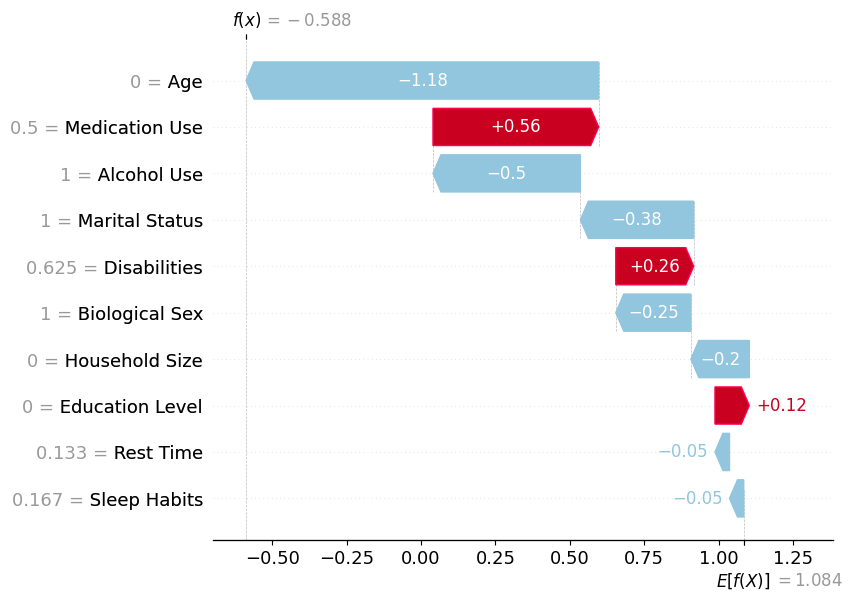

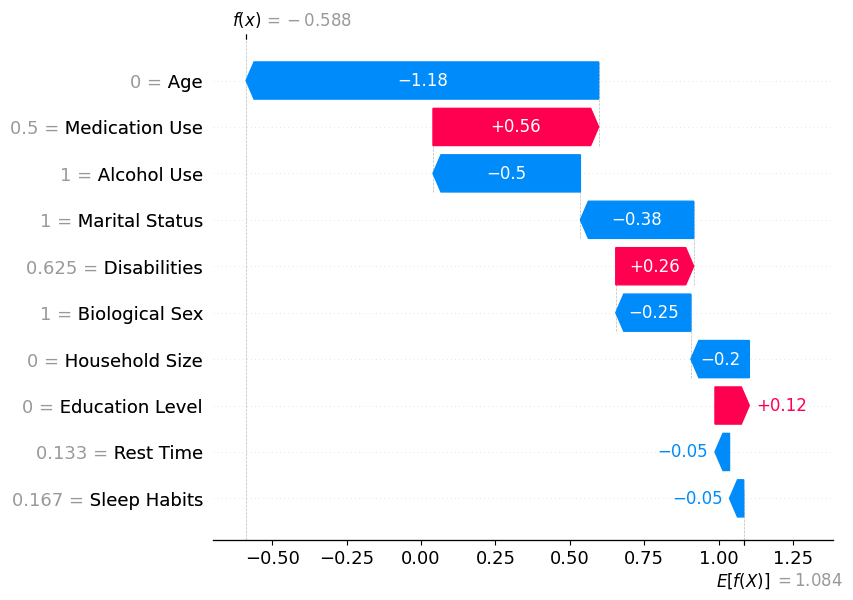

In [63]:
# Visualize SHAP values for the first prediction (single instance)

# Default SHAP colors
default_pos_color = "#ff0051"
default_neg_color = "#008bfb"
# Custom colors
positive_color = "#ca0020"
negative_color = "#92c5de"
# Plot Waterfall Plot
shap.plots.waterfall(grouped_shap_values[0], show = False)
# Change the colormap of the artists
for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if (isinstance(fcc, mplot.patches.FancyArrow)):
            if (mplot.colors.to_hex(fcc.get_facecolor()) == default_pos_color):
                fcc.set_facecolor(positive_color)
            elif (mplot.colors.to_hex(fcc.get_facecolor()) == default_neg_color):
                fcc.set_color(negative_color)
        elif (isinstance(fcc, plt.Text)):
            if (mplot.colors.to_hex(fcc.get_color()) == default_pos_color):
                fcc.set_color(positive_color)
            elif (mplot.colors.to_hex(fcc.get_color()) == default_neg_color):
                fcc.set_color(negative_color)
plt.show()
shap.plots.waterfall(grouped_shap_values[0], max_display=10)  # Visualize for the first instance

In [64]:
grouped_shap_values.feature_names

['Biological Sex',
 'Marital Status',
 'Age',
 'Education Level',
 'Household Size',
 'Medication Use',
 'Sleep Habits',
 'Alcohol Use',
 'Disabilities',
 'Rest Time']

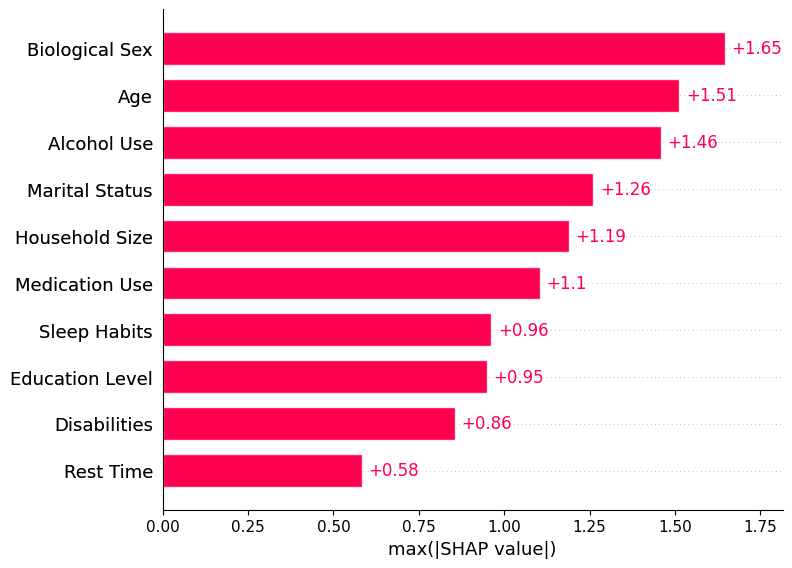

In [65]:
# Global feature importance (bar plot) for the positive class (entire dataset)
shap.plots.bar(grouped_shap_values.abs.max(0))

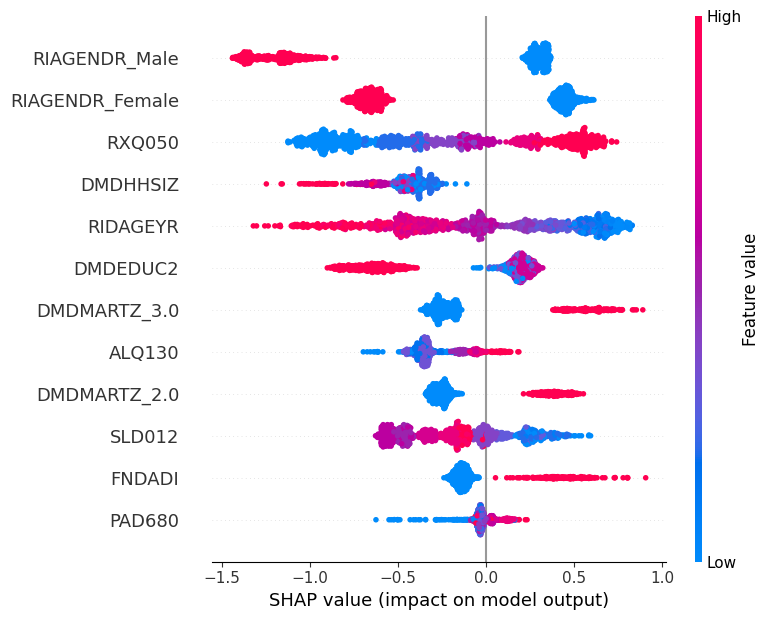

In [66]:
import shap
shap.initjs()
# Explain the model
explainer = shap.Explainer(loaded_model, X_train_scaled)
shap_values = explainer(X_test_scaled)

# Global importance plot
shap.summary_plot(shap_values, X_test_scaled)

# Local explanation for one instance
shap.force_plot(shap_values[0])

In [ ]:
'''
import shap
shap.initjs()

#Your existing grouped feature mapping
grouped_features = {
    'Biological Sex': ['RIAGENDR_Male', 'RIAGENDR_Female'],
    'Marital Status': ['DMDMARTZ_2.0', 'DMDMARTZ_3.0'],
    'Age': ['RIDAGEYR'],
    'Education Level': ['DMDEDUC2'],
    'Household Size': ['DMDHHSIZ'],
    'Medication Use': ['RXQ050'],
    'Sleep Habits': ['SLD012'],
    'Alcohol Use': ['ALQ130'],
    'Disabilities': ['FNDADI'],
    'Rest Time': ['PAD680']
}

# Function to group SHAP values
def group_shap_values(shap_values, feature_names):
    # Convert to DataFrame
    shap_df = pd.DataFrame(shap_values, columns=feature_names)
    
    # Create a new dataframe to store grouped values
    grouped_shap_df = pd.DataFrame()

    for group_name, feature_list in grouped_features.items():
        # Sum the SHAP values for each group
        grouped_shap_df[group_name] = shap_df[feature_list].sum(axis=1, min_count=1)  # Handle NaNs

    return grouped_shap_df

# Apply grouping to SHAP values
grouped_shap_df = group_shap_values(shap_values.values, X_test_scaled.columns)

# Plot SHAP summary with grouped features
shap.summary_plot(grouped_shap_df.values, features=grouped_shap_df.columns)

shap.force_plot(grouped_shap_df.values[0])'
'''

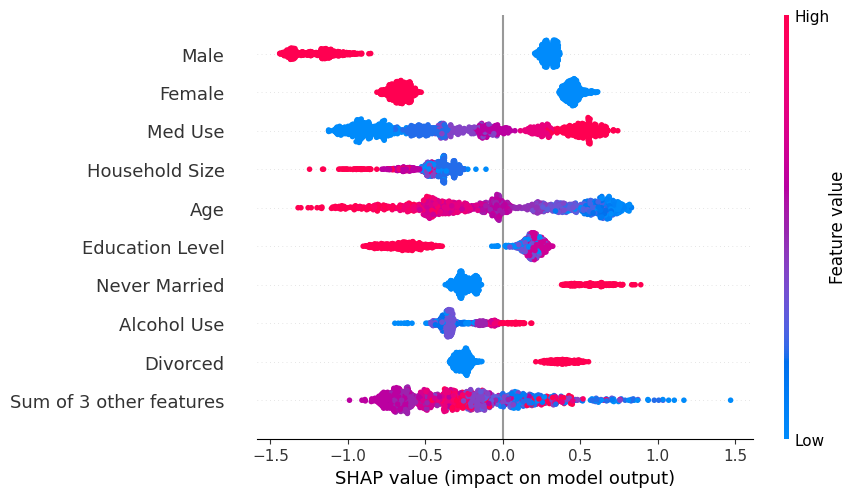

In [67]:
# Custom feature names
shap_names = ['Age', 'Female', 'Male', 'Divorced',
       'Never Married', 'Education Level', 'Household Size', 'Med Use', 'Sleep Habits', 'Alcohol Use',
       'Disabilities', 'Rest Time']

# Update SHAP object with custom feature names
shap_values.feature_names = shap_names  # Rename features

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size if needed
shap.plots.beeswarm(shap_values)

# Customize the title and labels
ax.set_title("Feature Importance", fontsize=16)
ax.set_xlabel("SHAP Value Impact", fontsize=12)
ax.set_ylabel("Features", fontsize=12)

plt.show()

In [68]:
import lime
import lime.lime_tabular

# Assuming your trained model is saved, load it
# loaded_model = joblib.load('path_to_your_model.pkl')  # Use this if you saved the model earlier

# X_train_scaled should be the scaled training data and y_train_smote is your target variable (use your variables)
# Also, X_train_scaled and y_train_smote should be your previously defined dataset
# You have already split your data into X_train, X_test, y_train, and y_test

# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled.values,  # Training data as numpy array
    feature_names=X_train_scaled.columns,  # Feature names from your training data
    class_names=np.unique(y_train_smote),  # Unique class labels
    mode='classification'  # Set this to 'regression' if your model is a regression model
)

# Choose an instance from the test set (for explanation)
instance = X_test_scaled.iloc[0]  # You can change this to any other test sample

# Explain the model's prediction for the selected instance
explanation = explainer.explain_instance(instance.values, loaded_model.predict_proba)

# Show the explanation
explanation.show_in_notebook()  # This will show a nice visualization in a Jupyter notebook

# You can also display the explanation as text (if you want to see the feature contributions)
print(explanation.as_list())

[('ALQ130 > 0.17', -0.06039435139173902), ('0.00 < RIAGENDR_Male <= 1.00', -0.05702617232357777), ('0.00 < DMDMARTZ_3.0 <= 1.00', 0.04311605882218595), ('RIAGENDR_Female <= 0.00', 0.0378119298469339), ('RIDAGEYR <= 0.25', 0.03442934396421985), ('DMDMARTZ_2.0 <= 0.00', -0.034180323542047884), ('FNDADI <= 0.00', -0.026011631940100075), ('0.50 < DMDEDUC2 <= 0.75', 0.02010724619121822), ('0.17 < DMDHHSIZ <= 0.33', 0.014892106965550553), ('0.48 < SLD012 <= 0.54', 0.01440666802340433)]


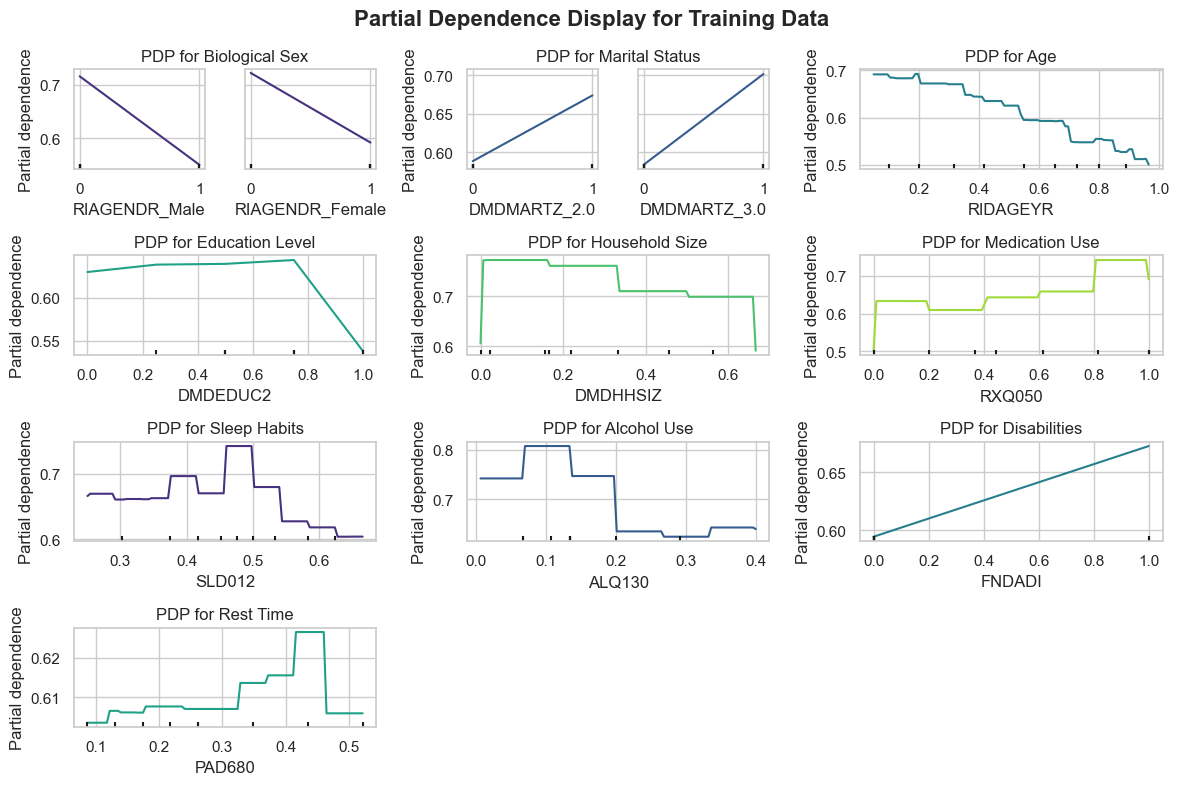

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
import seaborn as sns

def plot_grouped_pdp(model, X_train, grouped_features, figsize=(12, 8), color_palette='viridis'):
    """
    Plot Partial Dependence Plots (PDPs) for a given model and grouped features.

    Parameters:
    - model: trained model
        The trained machine learning model (e.g., LightGBM).
    - X_train: DataFrame
        The training data.
    - grouped_features: dict
        A dictionary where the keys are the names of the groups, and the values are lists of feature names to group.
    - figsize: tuple, optional
        The size of the figure (default is (12, 8)).
    - color_palette: str, optional
        The name of the color palette to use (default is 'viridis').
    """
    # Set the style of the plots
    sns.set(style="whitegrid")

    # Define the number of rows and columns for subplot layout
    n_groups = len(grouped_features)
    n_cols = 3  # Adjust the number of columns in the plot grid
    n_rows = (n_groups + n_cols - 1) // n_cols  # Calculate rows to fit all groups

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()  # Flatten the axes for easier indexing

    # Plot each group of features as a single PDP
    for idx, (group_name, features) in enumerate(grouped_features.items()):
        ax = axes[idx]
        # Use PartialDependenceDisplay for newer versions of sklearn
        PartialDependenceDisplay.from_estimator(
            model, X_train, features=features, ax=ax, line_kw={"color": sns.color_palette(color_palette)[idx % len(sns.color_palette(color_palette))]}
        )
        ax.set_title(f"PDP for {group_name}")
    
    # Hide any unused subplots
    for idx in range(len(grouped_features), len(axes)):
        axes[idx].axis('off')

    fig.suptitle("Partial Dependence Display for Training Data", fontsize=16, fontweight="bold")
    plt.tight_layout()  # Adjust layout to avoid overlapping
    plt.savefig("C:/Thesis/predepression_app/pdp_plot.png")
    plt.show()  # Display the plot directly in the Jupyter notebook
    
# Example usage:
grouped_features = {
    'Biological Sex': ['RIAGENDR_Male', 'RIAGENDR_Female'],
    'Marital Status': ['DMDMARTZ_2.0', 'DMDMARTZ_3.0'],
    'Age': ['RIDAGEYR'],
    'Education Level': ['DMDEDUC2'],
    'Household Size': ['DMDHHSIZ'],
    'Medication Use': ['RXQ050'],
    'Sleep Habits': ['SLD012'],
    'Alcohol Use': ['ALQ130'],
    'Disabilities': ['FNDADI'],
    'Rest Time': ['PAD680']
}

# Call the function with your model and training data
plot_grouped_pdp(loaded_model, X_train_scaled, grouped_features)


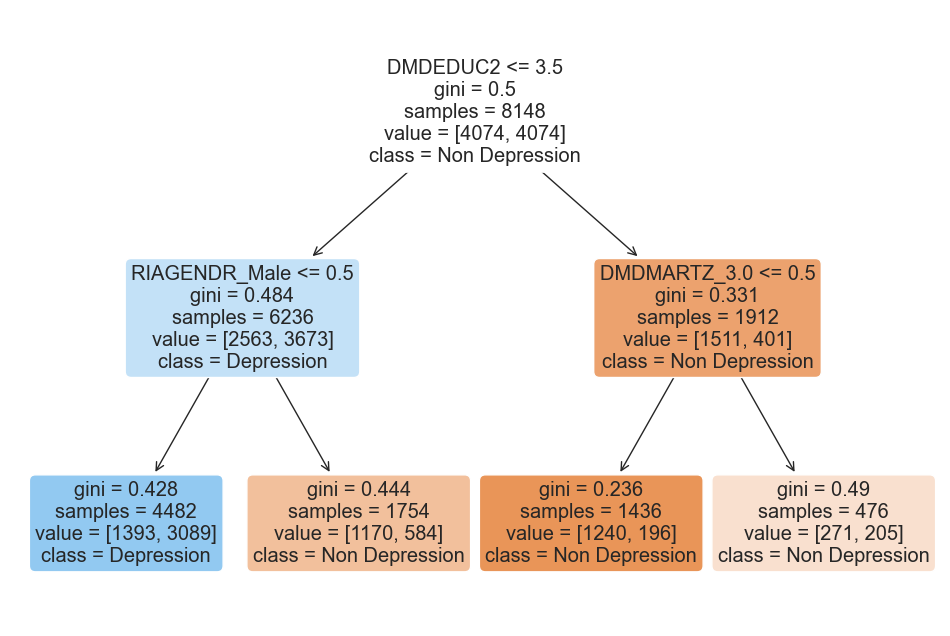

In [74]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_model.fit(X_train_selected, y_train_smote)

# Save the trained decision tree model
with open('C:/Thesis/predepression_app/DT_model.pkl', 'wb') as f:
    pickle.dump(tree_model, f)

# Plot the decision tree
plt.figure(figsize=(12, 8))  # Adjust figure size
plot_tree(tree_model, filled=True, rounded=True, feature_names=X_train_selected.columns, class_names=['Non Depression', 'Depression'])
plt.savefig("C:/Thesis/predepression_app/dt_model.png", dpi=500)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train Decision Tree model (assuming it's already trained)
tree_model = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_model.fit(X_train_selected, y_train_smote)

# Customize the plot
plt.figure(figsize=(12, 8))  # Adjust figure size
plot_tree(
    tree_model,
    filled=True,
    rounded=True,
    feature_names=X_train_selected.columns,
    class_names=['Non Depression', 'Depression'],
    fontsize=12,  # Adjust font size
    precision=2,  # Control the number of decimal places for the features
    label='all',  # 'all', 'root', or 'none' to control what labels are shown
    proportion=True,  # Proportions in nodes rather than counts
    node_ids=True,  # Display node ids for reference
    impurity=False,  # Hide the Gini index/impurity if you prefer
)

# Add a title to the plot
plt.title("Decision Tree - Depression Classification", fontsize=16)

# Show the plot
plt.show()